In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-ee-mZ8500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 3rd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-3.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-3.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-3.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-3.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-3.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-3.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-3.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 4th DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-4.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-4.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-4.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-4.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-4.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-4.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-4.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

340119
341019
339900
340413


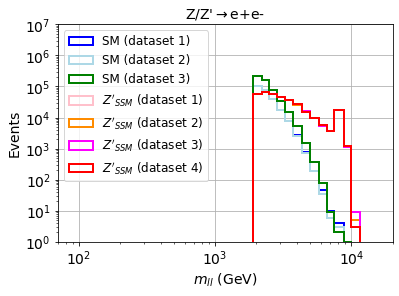

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/ee/"

invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 2)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 3)")


folder_saved = "Zprime-SSM-ee-mZ8500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')
invariant_mass_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved +"mee-4.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")
plt.hist(invariant_mass_eeSSMZprime_3, bins=bins_atlas, lw=2, edgecolor='magenta', histtype='step', label="$Z'_{SSM}$ (dataset 3)")
plt.hist(invariant_mass_eeSSMZprime_4, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$ (dataset 4)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/ee/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-pt.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-eta.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-phi.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-pt.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-eta.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-phi.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.47 or -1.52 < e1eta_eeSM[i] < -1.37 or 1.37 < e1eta_eeSM[i] < 1.52 or e1eta_eeSM[i] > 2.47 or e2eta_eeSM[i] < -2.47 or -1.52 < e2eta_eeSM[i] < -1.37 or 1.37 < e2eta_eeSM[i] < 1.52 or e2eta_eeSM[i] > 2.47:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800








# 3rd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800-2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800-2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800-2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800-2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800-2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800





# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.47
2.47
-2.47
2.47


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-ee-mZ8500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.47 or -1.52 < e1eta_eeSSMZprime[i] < -1.37 or 1.37 < e1eta_eeSSMZprime[i] < 1.52 or e1eta_eeSSMZprime[i] > 2.47 or e2eta_eeSSMZprime[i] < -2.47 or -1.52 < e2eta_eeSSMZprime[i] < -1.37 or 1.37 < e2eta_eeSSMZprime[i] < 1.52 or e2eta_eeSSMZprime[i] > 2.47:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)
        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_2[i] < 1.52 or e1eta_eeSSMZprime_2[i] > 2.47 or e2eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_2[i] < 1.52 or e2eta_eeSSMZprime_2[i] > 2.47:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2







        
# 3rd DATASET
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

e1pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-3.txt', delimiter=',')
e1eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-3.txt', delimiter=',')
e1phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-3.txt', delimiter=',')

e2pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-3.txt', delimiter=',')
e2eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-3.txt', delimiter=',')
e2phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-3.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_3))):
    if invariant_mass_eeSSMZprime_3[i]< 2000 or e1eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_3[i] < 1.52 or e1eta_eeSSMZprime_3[i] > 2.47 or e2eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_3[i] < 1.52 or e2eta_eeSSMZprime_3[i] > 2.47:
        e1pt_eeSSMZprime_3 = np.delete(e1pt_eeSSMZprime_3, i)
        e1eta_eeSSMZprime_3 = np.delete(e1eta_eeSSMZprime_3, i)
        e1phi_eeSSMZprime_3 = np.delete(e1phi_eeSSMZprime_3, i)
        
        e2pt_eeSSMZprime_3 = np.delete(e2pt_eeSSMZprime_3, i)
        e2eta_eeSSMZprime_3 = np.delete(e2eta_eeSSMZprime_3, i)
        e2phi_eeSSMZprime_3 = np.delete(e2phi_eeSSMZprime_3, i)
        
        invariant_mass_eeSSMZprime_3 = np.delete(invariant_mass_eeSSMZprime_3, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_3 = 1.*len(invariant_mass_eeSSMZprime_3) / eventos_parton
print(aceptancia_eeSSMZprime_3)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_3])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_3])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_3])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_3])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_3])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_3])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_3])



# remove the aux
del e1pt_eeSSMZprime_3
del e1eta_eeSSMZprime_3
del e1phi_eeSSMZprime_3

del e2pt_eeSSMZprime_3
del e2eta_eeSSMZprime_3
del e2phi_eeSSMZprime_3

del invariant_mass_eeSSMZprime_3







# 4th DATASET
invariant_mass_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved +"mee-4.txt", delimiter=',')

e1pt_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'e1-pt-8500-4.txt', delimiter=',')
e1eta_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'e1-eta-8500-4.txt', delimiter=',')
e1phi_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'e1-phi-8500-4.txt', delimiter=',')

e2pt_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'e2-pt-8500-4.txt', delimiter=',')
e2eta_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'e2-eta-8500-4.txt', delimiter=',')
e2phi_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'e2-phi-8500-4.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_4))):
    if invariant_mass_eeSSMZprime_4[i]< 2000 or e1eta_eeSSMZprime_4[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_4[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_4[i] < 1.52 or e1eta_eeSSMZprime_4[i] > 2.47 or e2eta_eeSSMZprime_4[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_4[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_4[i] < 1.52 or e2eta_eeSSMZprime_4[i] > 2.47:
        e1pt_eeSSMZprime_4 = np.delete(e1pt_eeSSMZprime_4, i)
        e1eta_eeSSMZprime_4 = np.delete(e1eta_eeSSMZprime_4, i)
        e1phi_eeSSMZprime_4 = np.delete(e1phi_eeSSMZprime_4, i)
        
        e2pt_eeSSMZprime_4 = np.delete(e2pt_eeSSMZprime_4, i)
        e2eta_eeSSMZprime_4 = np.delete(e2eta_eeSSMZprime_4, i)
        e2phi_eeSSMZprime_4 = np.delete(e2phi_eeSSMZprime_4, i)
        
        invariant_mass_eeSSMZprime_4 = np.delete(invariant_mass_eeSSMZprime_4, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_4 = 1.*len(invariant_mass_eeSSMZprime_4) / eventos_parton
print(aceptancia_eeSSMZprime_4)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_4])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_4])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_4])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_4])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_4])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_4])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_4])



# remove the aux
del e1pt_eeSSMZprime_4
del e1eta_eeSSMZprime_4
del e1phi_eeSSMZprime_4

del e2pt_eeSSMZprime_4
del e2eta_eeSSMZprime_4
del e2phi_eeSSMZprime_4

del invariant_mass_eeSSMZprime_4







# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.682006
0.679754
0.680766
(1361357,)
(1361357,)
(1361357,)
(1361357,)
(1361357,)
(1361357,)
(1361357,)
(1361357,)
(1361357,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.469
2.469
-2.469
2.469


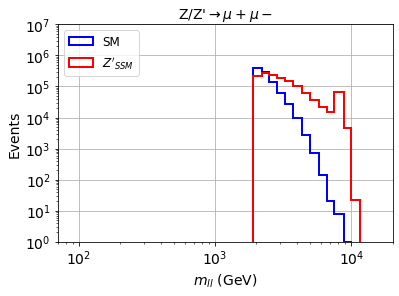

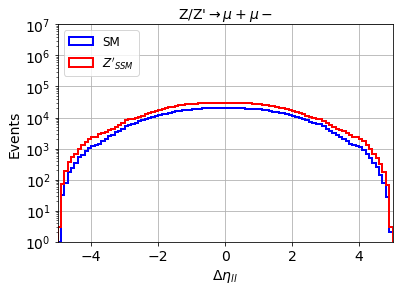

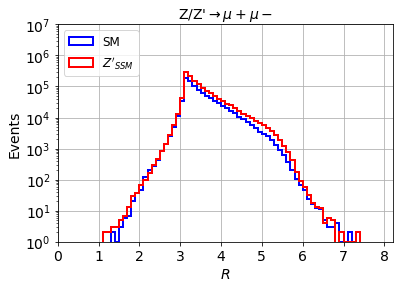

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.151555  0.458097  0.458625  0.175416  0.617409  0.964036  0.009301   
1        0.086163  0.242713  0.782623  0.112681  0.738462  0.299013  0.036945   
2        0.193460  0.516397  0.277371  0.219271  0.470648  0.789306  0.044364   
3        0.120953  0.424089  0.408498  0.146809  0.895951  0.924570  0.095850   
4        0.170359  0.415182  0.181254  0.190639  0.386235  0.636219  0.010575   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.164679  0.438462  0.150541  0.150942  0.617814  0.654997  0.005213   
1499996  0.352346  0.726923  0.628103  0.365344  0.562348  0.133195  0.260001   
1499997  0.204981  0.438664  0.949554  0.218981  0.342510  0.450987  0.057158   
1499998  0.113379  0.166599  0.107575  0.131028  0.713563  0.614895  0.122304   
1499999  0.199549  0.580972  0.996340  0.216528  0.380364  0.493953  0.078573   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67923	validation_1-logloss:0.67929
[1]	validation_0-logloss:0.66793	validation_1-logloss:0.66792
[2]	validation_0-logloss:0.65844	validation_1-logloss:0.65828
[3]	validation_0-logloss:0.65032	validation_1-logloss:0.65019
[4]	validation_0-logloss:0.64360	validation_1-logloss:0.64343
[5]	validation_0-logloss:0.63783	validation_1-logloss:0.63761
[6]	validation_0-logloss:0.63273	validation_1-logloss:0.63257
[7]	validation_0-logloss:0.62851	validation_1-logloss:0.62830
[8]	validation_0-logloss:0.62467	validation_1-logloss:0.62444
[9]	validation_0-logloss:0.62135	validation_1-logloss:0.62113
[10]	validation_0-logloss:0.61848	validation_1-logloss:0.61827
[11]	validation_0-logloss:0.61595	validation_1-logloss:0.61577
[12]	validation_0-logloss:0.61370	validation_1-logloss:0.61359
[13]	validation_0-logloss:0.61170	validation_1-logloss:0.61152
[14]	validation_0-logloss:0.60996	validation_1-logloss:0.60978
[15]	validation_0-logloss:0.60834	validation_1-logloss:0.60820
[1

[130]	validation_0-logloss:0.57486	validation_1-logloss:0.57751
[131]	validation_0-logloss:0.57483	validation_1-logloss:0.57750
[132]	validation_0-logloss:0.57481	validation_1-logloss:0.57748
[133]	validation_0-logloss:0.57478	validation_1-logloss:0.57748
[134]	validation_0-logloss:0.57473	validation_1-logloss:0.57744
[135]	validation_0-logloss:0.57470	validation_1-logloss:0.57744
[136]	validation_0-logloss:0.57467	validation_1-logloss:0.57742
[137]	validation_0-logloss:0.57462	validation_1-logloss:0.57738
[138]	validation_0-logloss:0.57460	validation_1-logloss:0.57738
[139]	validation_0-logloss:0.57457	validation_1-logloss:0.57737
[140]	validation_0-logloss:0.57455	validation_1-logloss:0.57736
[141]	validation_0-logloss:0.57451	validation_1-logloss:0.57734
[142]	validation_0-logloss:0.57449	validation_1-logloss:0.57732
[143]	validation_0-logloss:0.57447	validation_1-logloss:0.57732
[144]	validation_0-logloss:0.57444	validation_1-logloss:0.57732
[145]	validation_0-logloss:0.57442	valid

[259]	validation_0-logloss:0.57234	validation_1-logloss:0.57692
[260]	validation_0-logloss:0.57233	validation_1-logloss:0.57692
[261]	validation_0-logloss:0.57232	validation_1-logloss:0.57692
[262]	validation_0-logloss:0.57230	validation_1-logloss:0.57692
[263]	validation_0-logloss:0.57228	validation_1-logloss:0.57692
[264]	validation_0-logloss:0.57226	validation_1-logloss:0.57692
[265]	validation_0-logloss:0.57225	validation_1-logloss:0.57692
[266]	validation_0-logloss:0.57222	validation_1-logloss:0.57692
[267]	validation_0-logloss:0.57221	validation_1-logloss:0.57691
[268]	validation_0-logloss:0.57221	validation_1-logloss:0.57691
[269]	validation_0-logloss:0.57219	validation_1-logloss:0.57692
[270]	validation_0-logloss:0.57217	validation_1-logloss:0.57692
[271]	validation_0-logloss:0.57216	validation_1-logloss:0.57692
[272]	validation_0-logloss:0.57214	validation_1-logloss:0.57692
[273]	validation_0-logloss:0.57212	validation_1-logloss:0.57691
[274]	validation_0-logloss:0.57210	valid

[388]	validation_0-logloss:0.57038	validation_1-logloss:0.57694
[389]	validation_0-logloss:0.57036	validation_1-logloss:0.57693
[390]	validation_0-logloss:0.57035	validation_1-logloss:0.57693
[391]	validation_0-logloss:0.57033	validation_1-logloss:0.57693
[392]	validation_0-logloss:0.57030	validation_1-logloss:0.57693
[393]	validation_0-logloss:0.57029	validation_1-logloss:0.57693
[394]	validation_0-logloss:0.57028	validation_1-logloss:0.57692


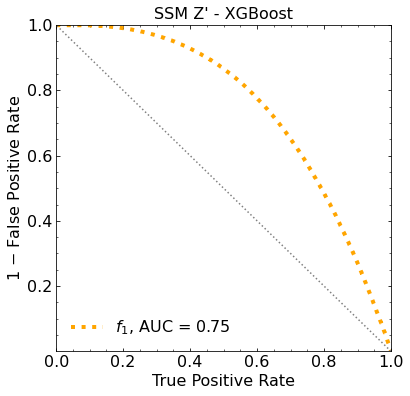

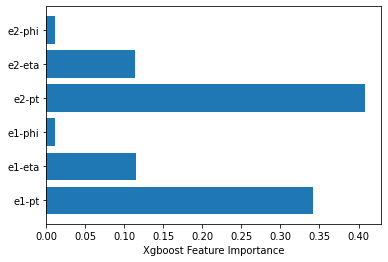

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67907	validation_1-logloss:0.67920
[1]	validation_0-logloss:0.66776	validation_1-logloss:0.66781
[2]	validation_0-logloss:0.65811	validation_1-logloss:0.65814
[3]	validation_0-logloss:0.65004	validation_1-logloss:0.65011
[4]	validation_0-logloss:0.64330	validation_1-logloss:0.64335
[5]	validation_0-logloss:0.63740	validation_1-logloss:0.63746
[6]	validation_0-logloss:0.63241	validation_1-logloss:0.63254
[7]	validation_0-logloss:0.62797	validation_1-logloss:0.62809
[8]	validation_0-logloss:0.62428	validation_1-logloss:0.62448
[9]	validation_0-logloss:0.62087	validation_1-logloss:0.62110
[10]	validation_0-logloss:0.61802	validation_1-logloss:0.61825
[11]	validation_0-logloss:0.61545	validation_1-logloss:0.61574
[12]	validation_0-logloss:0.61320	validation_1-logloss:0.61352
[13]	validation_0-logloss:0.61112	validation_1-logloss:0.61149
[14]	validation_0-logloss:0.60929	validation_1-logloss:0.60969
[15]	validation_0-logloss:0.60774	validation_1-logloss:0.60819
[1

[130]	validation_0-logloss:0.57264	validation_1-logloss:0.57800
[131]	validation_0-logloss:0.57252	validation_1-logloss:0.57793
[132]	validation_0-logloss:0.57247	validation_1-logloss:0.57791
[133]	validation_0-logloss:0.57243	validation_1-logloss:0.57791
[134]	validation_0-logloss:0.57240	validation_1-logloss:0.57790
[135]	validation_0-logloss:0.57234	validation_1-logloss:0.57788
[136]	validation_0-logloss:0.57229	validation_1-logloss:0.57788
[137]	validation_0-logloss:0.57226	validation_1-logloss:0.57786
[138]	validation_0-logloss:0.57223	validation_1-logloss:0.57786
[139]	validation_0-logloss:0.57218	validation_1-logloss:0.57786
[140]	validation_0-logloss:0.57217	validation_1-logloss:0.57785
[141]	validation_0-logloss:0.57213	validation_1-logloss:0.57783
[142]	validation_0-logloss:0.57209	validation_1-logloss:0.57783
[143]	validation_0-logloss:0.57205	validation_1-logloss:0.57783
[144]	validation_0-logloss:0.57201	validation_1-logloss:0.57782
[145]	validation_0-logloss:0.57198	valid

[259]	validation_0-logloss:0.56825	validation_1-logloss:0.57746
[260]	validation_0-logloss:0.56822	validation_1-logloss:0.57746
[261]	validation_0-logloss:0.56819	validation_1-logloss:0.57747
[262]	validation_0-logloss:0.56815	validation_1-logloss:0.57748
[263]	validation_0-logloss:0.56812	validation_1-logloss:0.57748
[264]	validation_0-logloss:0.56809	validation_1-logloss:0.57748
[265]	validation_0-logloss:0.56807	validation_1-logloss:0.57748
[266]	validation_0-logloss:0.56804	validation_1-logloss:0.57748
[267]	validation_0-logloss:0.56801	validation_1-logloss:0.57749
[268]	validation_0-logloss:0.56800	validation_1-logloss:0.57749
[269]	validation_0-logloss:0.56797	validation_1-logloss:0.57749
[270]	validation_0-logloss:0.56796	validation_1-logloss:0.57748
[271]	validation_0-logloss:0.56796	validation_1-logloss:0.57749
[272]	validation_0-logloss:0.56793	validation_1-logloss:0.57749
[273]	validation_0-logloss:0.56790	validation_1-logloss:0.57749
[274]	validation_0-logloss:0.56786	valid

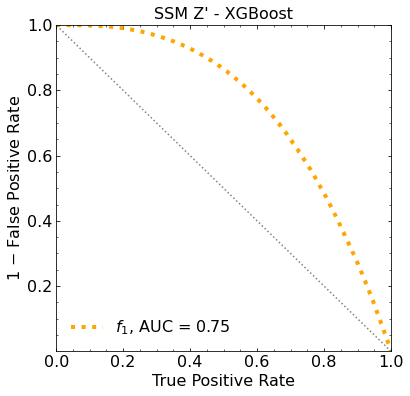


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67920	validation_1-logloss:0.67932
[1]	validation_0-logloss:0.66792	validation_1-logloss:0.66795
[2]	validation_0-logloss:0.65826	validation_1-logloss:0.65832
[3]	validation_0-logloss:0.65031	validation_1-logloss:0.65033
[4]	validation_0-logloss:0.64343	validation_1-logloss:0.64347
[5]	validation_0-logloss:0.63763	validation_1-logloss:0.63760
[6]	validation_0-logloss:0.63261	validation_1-logloss:0.63258
[7]	validation_0-logloss:0.62826	validation_1-logloss:0.62835
[8]	validation_0-logloss:0.62449	validation_1-logloss:0.62462
[9]	validation_0-logloss:0.62100	validation_1-logloss:0.62116
[10]	validation_0-logloss:0.61811	validation_1-logloss:0.61828
[11]	validation_0-logloss:0.61551	validation_1-logloss:0.61565
[12]	validation_0-logloss:0.61335	validation_1-logloss:0.61353
[13]	validation_0-logloss:0.61136	validation_1-logloss:0.61159
[14]	validation_0-logloss:0.60947	validation_1-logloss:0.60969
[15]	validation_0-logloss:0.60782	validation_1-logloss:0.60807
[1

[130]	validation_0-logloss:0.57331	validation_1-logloss:0.57810
[131]	validation_0-logloss:0.57327	validation_1-logloss:0.57810
[132]	validation_0-logloss:0.57324	validation_1-logloss:0.57809
[133]	validation_0-logloss:0.57318	validation_1-logloss:0.57808
[134]	validation_0-logloss:0.57307	validation_1-logloss:0.57801
[135]	validation_0-logloss:0.57302	validation_1-logloss:0.57801
[136]	validation_0-logloss:0.57298	validation_1-logloss:0.57800
[137]	validation_0-logloss:0.57294	validation_1-logloss:0.57800
[138]	validation_0-logloss:0.57292	validation_1-logloss:0.57800
[139]	validation_0-logloss:0.57290	validation_1-logloss:0.57799
[140]	validation_0-logloss:0.57283	validation_1-logloss:0.57797
[141]	validation_0-logloss:0.57279	validation_1-logloss:0.57796
[142]	validation_0-logloss:0.57276	validation_1-logloss:0.57796
[143]	validation_0-logloss:0.57268	validation_1-logloss:0.57793
[144]	validation_0-logloss:0.57264	validation_1-logloss:0.57794
[145]	validation_0-logloss:0.57261	valid

[259]	validation_0-logloss:0.56892	validation_1-logloss:0.57759
[260]	validation_0-logloss:0.56888	validation_1-logloss:0.57759
[261]	validation_0-logloss:0.56886	validation_1-logloss:0.57760
[262]	validation_0-logloss:0.56885	validation_1-logloss:0.57760
[263]	validation_0-logloss:0.56882	validation_1-logloss:0.57760
[264]	validation_0-logloss:0.56880	validation_1-logloss:0.57760
[265]	validation_0-logloss:0.56877	validation_1-logloss:0.57759
[266]	validation_0-logloss:0.56874	validation_1-logloss:0.57758
[267]	validation_0-logloss:0.56874	validation_1-logloss:0.57758
[268]	validation_0-logloss:0.56871	validation_1-logloss:0.57758
[269]	validation_0-logloss:0.56869	validation_1-logloss:0.57758
[270]	validation_0-logloss:0.56866	validation_1-logloss:0.57759
[271]	validation_0-logloss:0.56863	validation_1-logloss:0.57759
[272]	validation_0-logloss:0.56860	validation_1-logloss:0.57759
[273]	validation_0-logloss:0.56855	validation_1-logloss:0.57758
[274]	validation_0-logloss:0.56852	valid

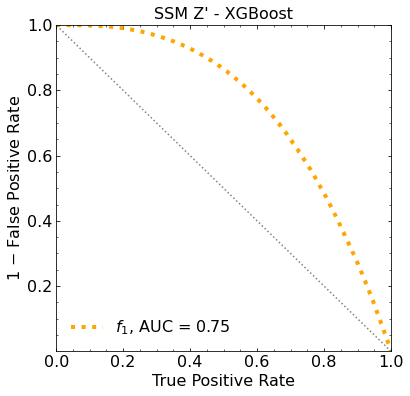


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67917	validation_1-logloss:0.67932
[1]	validation_0-logloss:0.66792	validation_1-logloss:0.66790
[2]	validation_0-logloss:0.65828	validation_1-logloss:0.65834
[3]	validation_0-logloss:0.65015	validation_1-logloss:0.65032
[4]	validation_0-logloss:0.64324	validation_1-logloss:0.64344
[5]	validation_0-logloss:0.63740	validation_1-logloss:0.63762
[6]	validation_0-logloss:0.63238	validation_1-logloss:0.63267
[7]	validation_0-logloss:0.62812	validation_1-logloss:0.62844
[8]	validation_0-logloss:0.62435	validation_1-logloss:0.62480
[9]	validation_0-logloss:0.62101	validation_1-logloss:0.62145
[10]	validation_0-logloss:0.61793	validation_1-logloss:0.61841
[11]	validation_0-logloss:0.61553	validation_1-logloss:0.61605
[12]	validation_0-logloss:0.61334	validation_1-logloss:0.61390
[13]	validation_0-logloss:0.61138	validation_1-logloss:0.61198
[14]	validation_0-logloss:0.60955	validation_1-logloss:0.61020
[15]	validation_0-logloss:0.60788	validation_1-logloss:0.60858
[1

[130]	validation_0-logloss:0.57255	validation_1-logloss:0.57817
[131]	validation_0-logloss:0.57250	validation_1-logloss:0.57816
[132]	validation_0-logloss:0.57246	validation_1-logloss:0.57815
[133]	validation_0-logloss:0.57242	validation_1-logloss:0.57815
[134]	validation_0-logloss:0.57237	validation_1-logloss:0.57812
[135]	validation_0-logloss:0.57235	validation_1-logloss:0.57812
[136]	validation_0-logloss:0.57231	validation_1-logloss:0.57811
[137]	validation_0-logloss:0.57227	validation_1-logloss:0.57812
[138]	validation_0-logloss:0.57223	validation_1-logloss:0.57811
[139]	validation_0-logloss:0.57220	validation_1-logloss:0.57812
[140]	validation_0-logloss:0.57216	validation_1-logloss:0.57810
[141]	validation_0-logloss:0.57213	validation_1-logloss:0.57810
[142]	validation_0-logloss:0.57203	validation_1-logloss:0.57804
[143]	validation_0-logloss:0.57201	validation_1-logloss:0.57803
[144]	validation_0-logloss:0.57197	validation_1-logloss:0.57803
[145]	validation_0-logloss:0.57192	valid

[259]	validation_0-logloss:0.56817	validation_1-logloss:0.57770
[260]	validation_0-logloss:0.56813	validation_1-logloss:0.57770
[261]	validation_0-logloss:0.56810	validation_1-logloss:0.57770
[262]	validation_0-logloss:0.56806	validation_1-logloss:0.57770
[263]	validation_0-logloss:0.56800	validation_1-logloss:0.57769
[264]	validation_0-logloss:0.56798	validation_1-logloss:0.57770
[265]	validation_0-logloss:0.56793	validation_1-logloss:0.57769
[266]	validation_0-logloss:0.56791	validation_1-logloss:0.57771
[267]	validation_0-logloss:0.56787	validation_1-logloss:0.57770
[268]	validation_0-logloss:0.56785	validation_1-logloss:0.57770
[269]	validation_0-logloss:0.56781	validation_1-logloss:0.57771
[270]	validation_0-logloss:0.56779	validation_1-logloss:0.57771
[271]	validation_0-logloss:0.56775	validation_1-logloss:0.57771
[272]	validation_0-logloss:0.56773	validation_1-logloss:0.57772
[273]	validation_0-logloss:0.56771	validation_1-logloss:0.57772
[274]	validation_0-logloss:0.56769	valid

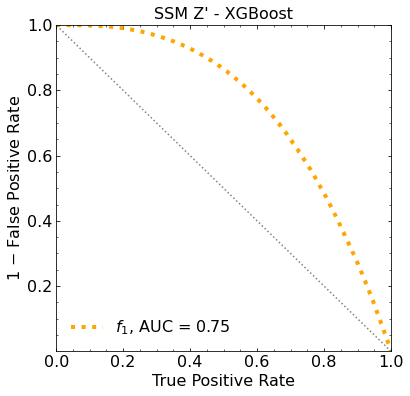


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67922	validation_1-logloss:0.67930
[1]	validation_0-logloss:0.66783	validation_1-logloss:0.66778
[2]	validation_0-logloss:0.65813	validation_1-logloss:0.65823
[3]	validation_0-logloss:0.65020	validation_1-logloss:0.65022
[4]	validation_0-logloss:0.64344	validation_1-logloss:0.64350
[5]	validation_0-logloss:0.63751	validation_1-logloss:0.63771
[6]	validation_0-logloss:0.63257	validation_1-logloss:0.63275
[7]	validation_0-logloss:0.62821	validation_1-logloss:0.62845
[8]	validation_0-logloss:0.62424	validation_1-logloss:0.62450
[9]	validation_0-logloss:0.62084	validation_1-logloss:0.62115
[10]	validation_0-logloss:0.61792	validation_1-logloss:0.61823
[11]	validation_0-logloss:0.61540	validation_1-logloss:0.61578
[12]	validation_0-logloss:0.61310	validation_1-logloss:0.61354
[13]	validation_0-logloss:0.61121	validation_1-logloss:0.61165
[14]	validation_0-logloss:0.60945	validation_1-logloss:0.60989
[15]	validation_0-logloss:0.60772	validation_1-logloss:0.60820
[1

[130]	validation_0-logloss:0.57285	validation_1-logloss:0.57815
[131]	validation_0-logloss:0.57281	validation_1-logloss:0.57814
[132]	validation_0-logloss:0.57277	validation_1-logloss:0.57814
[133]	validation_0-logloss:0.57274	validation_1-logloss:0.57813
[134]	validation_0-logloss:0.57269	validation_1-logloss:0.57809
[135]	validation_0-logloss:0.57263	validation_1-logloss:0.57807
[136]	validation_0-logloss:0.57259	validation_1-logloss:0.57807
[137]	validation_0-logloss:0.57257	validation_1-logloss:0.57806
[138]	validation_0-logloss:0.57253	validation_1-logloss:0.57806
[139]	validation_0-logloss:0.57249	validation_1-logloss:0.57805
[140]	validation_0-logloss:0.57246	validation_1-logloss:0.57804
[141]	validation_0-logloss:0.57242	validation_1-logloss:0.57802
[142]	validation_0-logloss:0.57239	validation_1-logloss:0.57802
[143]	validation_0-logloss:0.57237	validation_1-logloss:0.57802
[144]	validation_0-logloss:0.57234	validation_1-logloss:0.57802
[145]	validation_0-logloss:0.57230	valid

[259]	validation_0-logloss:0.56857	validation_1-logloss:0.57772
[260]	validation_0-logloss:0.56855	validation_1-logloss:0.57772
[261]	validation_0-logloss:0.56852	validation_1-logloss:0.57773
[262]	validation_0-logloss:0.56850	validation_1-logloss:0.57773
[263]	validation_0-logloss:0.56847	validation_1-logloss:0.57772
[264]	validation_0-logloss:0.56844	validation_1-logloss:0.57772
[265]	validation_0-logloss:0.56840	validation_1-logloss:0.57772
[266]	validation_0-logloss:0.56837	validation_1-logloss:0.57771
[267]	validation_0-logloss:0.56836	validation_1-logloss:0.57771
[268]	validation_0-logloss:0.56833	validation_1-logloss:0.57771
[269]	validation_0-logloss:0.56830	validation_1-logloss:0.57771
[270]	validation_0-logloss:0.56824	validation_1-logloss:0.57769
[271]	validation_0-logloss:0.56820	validation_1-logloss:0.57769
[272]	validation_0-logloss:0.56818	validation_1-logloss:0.57769
[273]	validation_0-logloss:0.56816	validation_1-logloss:0.57769
[274]	validation_0-logloss:0.56813	valid

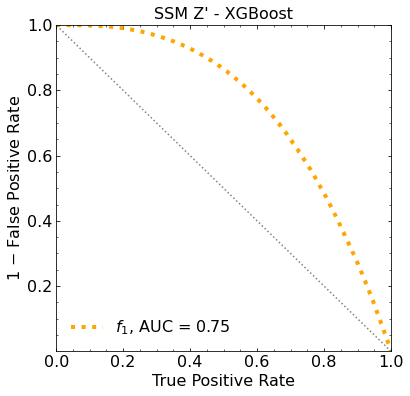


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67948	validation_1-logloss:0.67931
[1]	validation_0-logloss:0.66771	validation_1-logloss:0.66782
[2]	validation_0-logloss:0.65839	validation_1-logloss:0.65838
[3]	validation_0-logloss:0.65039	validation_1-logloss:0.65034
[4]	validation_0-logloss:0.64346	validation_1-logloss:0.64347
[5]	validation_0-logloss:0.63777	validation_1-logloss:0.63773
[6]	validation_0-logloss:0.63272	validation_1-logloss:0.63271
[7]	validation_0-logloss:0.62833	validation_1-logloss:0.62835
[8]	validation_0-logloss:0.62473	validation_1-logloss:0.62475
[9]	validation_0-logloss:0.62139	validation_1-logloss:0.62145
[10]	validation_0-logloss:0.61844	validation_1-logloss:0.61854
[11]	validation_0-logloss:0.61574	validation_1-logloss:0.61586
[12]	validation_0-logloss:0.61356	validation_1-logloss:0.61375
[13]	validation_0-logloss:0.61151	validation_1-logloss:0.61170
[14]	validation_0-logloss:0.60961	validation_1-logloss:0.60986
[15]	validation_0-logloss:0.60800	validation_1-logloss:0.60830
[1

[130]	validation_0-logloss:0.57326	validation_1-logloss:0.57817
[131]	validation_0-logloss:0.57322	validation_1-logloss:0.57815
[132]	validation_0-logloss:0.57320	validation_1-logloss:0.57815
[133]	validation_0-logloss:0.57316	validation_1-logloss:0.57814
[134]	validation_0-logloss:0.57308	validation_1-logloss:0.57810
[135]	validation_0-logloss:0.57304	validation_1-logloss:0.57809
[136]	validation_0-logloss:0.57300	validation_1-logloss:0.57808
[137]	validation_0-logloss:0.57295	validation_1-logloss:0.57807
[138]	validation_0-logloss:0.57289	validation_1-logloss:0.57805
[139]	validation_0-logloss:0.57285	validation_1-logloss:0.57805
[140]	validation_0-logloss:0.57280	validation_1-logloss:0.57803
[141]	validation_0-logloss:0.57277	validation_1-logloss:0.57803
[142]	validation_0-logloss:0.57272	validation_1-logloss:0.57801
[143]	validation_0-logloss:0.57269	validation_1-logloss:0.57801
[144]	validation_0-logloss:0.57267	validation_1-logloss:0.57800
[145]	validation_0-logloss:0.57262	valid

[259]	validation_0-logloss:0.56894	validation_1-logloss:0.57765
[260]	validation_0-logloss:0.56890	validation_1-logloss:0.57764
[261]	validation_0-logloss:0.56887	validation_1-logloss:0.57764
[262]	validation_0-logloss:0.56884	validation_1-logloss:0.57765
[263]	validation_0-logloss:0.56877	validation_1-logloss:0.57764
[264]	validation_0-logloss:0.56875	validation_1-logloss:0.57764
[265]	validation_0-logloss:0.56872	validation_1-logloss:0.57764
[266]	validation_0-logloss:0.56869	validation_1-logloss:0.57764
[267]	validation_0-logloss:0.56866	validation_1-logloss:0.57764
[268]	validation_0-logloss:0.56862	validation_1-logloss:0.57764
[269]	validation_0-logloss:0.56859	validation_1-logloss:0.57765
[270]	validation_0-logloss:0.56857	validation_1-logloss:0.57764
[271]	validation_0-logloss:0.56854	validation_1-logloss:0.57764
[272]	validation_0-logloss:0.56853	validation_1-logloss:0.57764
[273]	validation_0-logloss:0.56851	validation_1-logloss:0.57764
[274]	validation_0-logloss:0.56848	valid

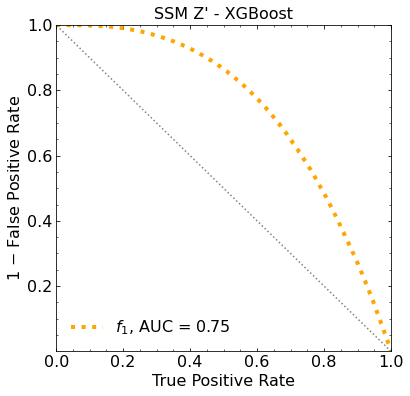


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67977	validation_1-logloss:0.67976
[1]	validation_0-logloss:0.66838	validation_1-logloss:0.66834
[2]	validation_0-logloss:0.65879	validation_1-logloss:0.65867
[3]	validation_0-logloss:0.65077	validation_1-logloss:0.65065
[4]	validation_0-logloss:0.64409	validation_1-logloss:0.64387
[5]	validation_0-logloss:0.63819	validation_1-logloss:0.63797
[6]	validation_0-logloss:0.63313	validation_1-logloss:0.63292
[7]	validation_0-logloss:0.62883	validation_1-logloss:0.62859
[8]	validation_0-logloss:0.62513	validation_1-logloss:0.62491
[9]	validation_0-logloss:0.62195	validation_1-logloss:0.62172
[10]	validation_0-logloss:0.61904	validation_1-logloss:0.61884
[11]	validation_0-logloss:0.61638	validation_1-logloss:0.61618
[12]	validation_0-logloss:0.61415	validation_1-logloss:0.61399
[13]	validation_0-logloss:0.61205	validation_1-logloss:0.61194
[14]	validation_0-logloss:0.61019	validation_1-logloss:0.61006
[15]	validation_0-logloss:0.60842	validation_1-logloss:0.60838
[1

[130]	validation_0-logloss:0.57359	validation_1-logloss:0.57795
[131]	validation_0-logloss:0.57356	validation_1-logloss:0.57794
[132]	validation_0-logloss:0.57353	validation_1-logloss:0.57793
[133]	validation_0-logloss:0.57346	validation_1-logloss:0.57789
[134]	validation_0-logloss:0.57342	validation_1-logloss:0.57789
[135]	validation_0-logloss:0.57338	validation_1-logloss:0.57789
[136]	validation_0-logloss:0.57335	validation_1-logloss:0.57788
[137]	validation_0-logloss:0.57331	validation_1-logloss:0.57788
[138]	validation_0-logloss:0.57328	validation_1-logloss:0.57788
[139]	validation_0-logloss:0.57321	validation_1-logloss:0.57784
[140]	validation_0-logloss:0.57317	validation_1-logloss:0.57782
[141]	validation_0-logloss:0.57312	validation_1-logloss:0.57781
[142]	validation_0-logloss:0.57308	validation_1-logloss:0.57780
[143]	validation_0-logloss:0.57305	validation_1-logloss:0.57781
[144]	validation_0-logloss:0.57298	validation_1-logloss:0.57777
[145]	validation_0-logloss:0.57295	valid

[259]	validation_0-logloss:0.56936	validation_1-logloss:0.57743
[260]	validation_0-logloss:0.56931	validation_1-logloss:0.57743
[261]	validation_0-logloss:0.56928	validation_1-logloss:0.57743
[262]	validation_0-logloss:0.56924	validation_1-logloss:0.57744
[263]	validation_0-logloss:0.56922	validation_1-logloss:0.57744


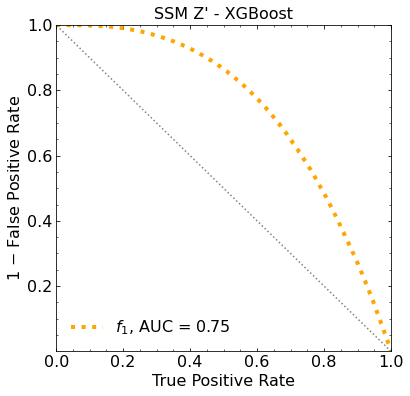


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67924	validation_1-logloss:0.67931
[1]	validation_0-logloss:0.66773	validation_1-logloss:0.66778
[2]	validation_0-logloss:0.65807	validation_1-logloss:0.65805
[3]	validation_0-logloss:0.65004	validation_1-logloss:0.65001
[4]	validation_0-logloss:0.64323	validation_1-logloss:0.64319
[5]	validation_0-logloss:0.63733	validation_1-logloss:0.63725
[6]	validation_0-logloss:0.63232	validation_1-logloss:0.63220
[7]	validation_0-logloss:0.62792	validation_1-logloss:0.62782
[8]	validation_0-logloss:0.62428	validation_1-logloss:0.62416
[9]	validation_0-logloss:0.62104	validation_1-logloss:0.62097
[10]	validation_0-logloss:0.61810	validation_1-logloss:0.61812
[11]	validation_0-logloss:0.61561	validation_1-logloss:0.61567
[12]	validation_0-logloss:0.61308	validation_1-logloss:0.61321
[13]	validation_0-logloss:0.61104	validation_1-logloss:0.61119
[14]	validation_0-logloss:0.60914	validation_1-logloss:0.60934
[15]	validation_0-logloss:0.60749	validation_1-logloss:0.60774
[1

[130]	validation_0-logloss:0.57240	validation_1-logloss:0.57802
[131]	validation_0-logloss:0.57235	validation_1-logloss:0.57801
[132]	validation_0-logloss:0.57231	validation_1-logloss:0.57801
[133]	validation_0-logloss:0.57228	validation_1-logloss:0.57800
[134]	validation_0-logloss:0.57222	validation_1-logloss:0.57798
[135]	validation_0-logloss:0.57217	validation_1-logloss:0.57798
[136]	validation_0-logloss:0.57213	validation_1-logloss:0.57797
[137]	validation_0-logloss:0.57211	validation_1-logloss:0.57796
[138]	validation_0-logloss:0.57208	validation_1-logloss:0.57796
[139]	validation_0-logloss:0.57206	validation_1-logloss:0.57795
[140]	validation_0-logloss:0.57196	validation_1-logloss:0.57790
[141]	validation_0-logloss:0.57191	validation_1-logloss:0.57789
[142]	validation_0-logloss:0.57188	validation_1-logloss:0.57788
[143]	validation_0-logloss:0.57185	validation_1-logloss:0.57788
[144]	validation_0-logloss:0.57182	validation_1-logloss:0.57788
[145]	validation_0-logloss:0.57176	valid

[259]	validation_0-logloss:0.56804	validation_1-logloss:0.57753
[260]	validation_0-logloss:0.56802	validation_1-logloss:0.57753
[261]	validation_0-logloss:0.56801	validation_1-logloss:0.57753
[262]	validation_0-logloss:0.56799	validation_1-logloss:0.57752
[263]	validation_0-logloss:0.56795	validation_1-logloss:0.57752
[264]	validation_0-logloss:0.56793	validation_1-logloss:0.57752
[265]	validation_0-logloss:0.56788	validation_1-logloss:0.57753
[266]	validation_0-logloss:0.56786	validation_1-logloss:0.57753
[267]	validation_0-logloss:0.56786	validation_1-logloss:0.57752
[268]	validation_0-logloss:0.56783	validation_1-logloss:0.57752
[269]	validation_0-logloss:0.56780	validation_1-logloss:0.57752
[270]	validation_0-logloss:0.56775	validation_1-logloss:0.57752
[271]	validation_0-logloss:0.56770	validation_1-logloss:0.57752
[272]	validation_0-logloss:0.56767	validation_1-logloss:0.57752
[273]	validation_0-logloss:0.56762	validation_1-logloss:0.57751
[274]	validation_0-logloss:0.56759	valid

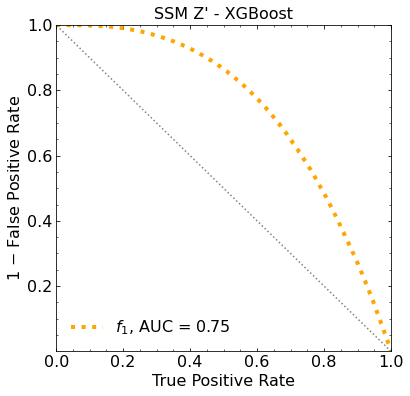


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67911	validation_1-logloss:0.67924
[1]	validation_0-logloss:0.66769	validation_1-logloss:0.66779
[2]	validation_0-logloss:0.65811	validation_1-logloss:0.65826
[3]	validation_0-logloss:0.64974	validation_1-logloss:0.64995
[4]	validation_0-logloss:0.64274	validation_1-logloss:0.64301
[5]	validation_0-logloss:0.63682	validation_1-logloss:0.63714
[6]	validation_0-logloss:0.63178	validation_1-logloss:0.63218
[7]	validation_0-logloss:0.62734	validation_1-logloss:0.62774
[8]	validation_0-logloss:0.62351	validation_1-logloss:0.62395
[9]	validation_0-logloss:0.62013	validation_1-logloss:0.62060
[10]	validation_0-logloss:0.61736	validation_1-logloss:0.61793
[11]	validation_0-logloss:0.61465	validation_1-logloss:0.61529
[12]	validation_0-logloss:0.61242	validation_1-logloss:0.61306
[13]	validation_0-logloss:0.61038	validation_1-logloss:0.61109
[14]	validation_0-logloss:0.60846	validation_1-logloss:0.60921
[15]	validation_0-logloss:0.60685	validation_1-logloss:0.60769
[1

[130]	validation_0-logloss:0.57234	validation_1-logloss:0.57817
[131]	validation_0-logloss:0.57229	validation_1-logloss:0.57816
[132]	validation_0-logloss:0.57226	validation_1-logloss:0.57815
[133]	validation_0-logloss:0.57220	validation_1-logloss:0.57813
[134]	validation_0-logloss:0.57214	validation_1-logloss:0.57810
[135]	validation_0-logloss:0.57208	validation_1-logloss:0.57810
[136]	validation_0-logloss:0.57204	validation_1-logloss:0.57810
[137]	validation_0-logloss:0.57202	validation_1-logloss:0.57810
[138]	validation_0-logloss:0.57199	validation_1-logloss:0.57810
[139]	validation_0-logloss:0.57195	validation_1-logloss:0.57808
[140]	validation_0-logloss:0.57190	validation_1-logloss:0.57807
[141]	validation_0-logloss:0.57184	validation_1-logloss:0.57803
[142]	validation_0-logloss:0.57181	validation_1-logloss:0.57802
[143]	validation_0-logloss:0.57177	validation_1-logloss:0.57801
[144]	validation_0-logloss:0.57172	validation_1-logloss:0.57800
[145]	validation_0-logloss:0.57170	valid

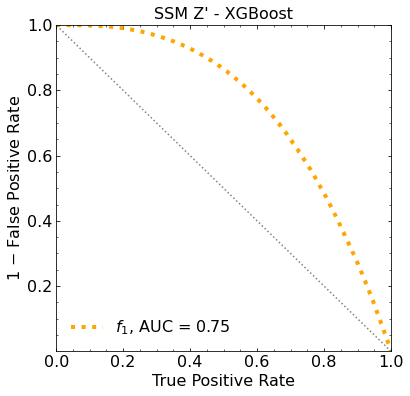


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67942	validation_1-logloss:0.67923
[1]	validation_0-logloss:0.66783	validation_1-logloss:0.66783
[2]	validation_0-logloss:0.65829	validation_1-logloss:0.65820
[3]	validation_0-logloss:0.65039	validation_1-logloss:0.65025
[4]	validation_0-logloss:0.64364	validation_1-logloss:0.64354
[5]	validation_0-logloss:0.63780	validation_1-logloss:0.63769
[6]	validation_0-logloss:0.63289	validation_1-logloss:0.63282
[7]	validation_0-logloss:0.62854	validation_1-logloss:0.62850
[8]	validation_0-logloss:0.62485	validation_1-logloss:0.62479
[9]	validation_0-logloss:0.62155	validation_1-logloss:0.62148
[10]	validation_0-logloss:0.61854	validation_1-logloss:0.61849
[11]	validation_0-logloss:0.61609	validation_1-logloss:0.61608
[12]	validation_0-logloss:0.61395	validation_1-logloss:0.61399
[13]	validation_0-logloss:0.61176	validation_1-logloss:0.61179
[14]	validation_0-logloss:0.60984	validation_1-logloss:0.60993
[15]	validation_0-logloss:0.60785	validation_1-logloss:0.60798
[1

[130]	validation_0-logloss:0.57355	validation_1-logloss:0.57818
[131]	validation_0-logloss:0.57350	validation_1-logloss:0.57817
[132]	validation_0-logloss:0.57348	validation_1-logloss:0.57817
[133]	validation_0-logloss:0.57344	validation_1-logloss:0.57816
[134]	validation_0-logloss:0.57340	validation_1-logloss:0.57816
[135]	validation_0-logloss:0.57335	validation_1-logloss:0.57814
[136]	validation_0-logloss:0.57331	validation_1-logloss:0.57813
[137]	validation_0-logloss:0.57327	validation_1-logloss:0.57812
[138]	validation_0-logloss:0.57323	validation_1-logloss:0.57811
[139]	validation_0-logloss:0.57317	validation_1-logloss:0.57808
[140]	validation_0-logloss:0.57313	validation_1-logloss:0.57808
[141]	validation_0-logloss:0.57310	validation_1-logloss:0.57807
[142]	validation_0-logloss:0.57305	validation_1-logloss:0.57805
[143]	validation_0-logloss:0.57303	validation_1-logloss:0.57805
[144]	validation_0-logloss:0.57300	validation_1-logloss:0.57805
[145]	validation_0-logloss:0.57296	valid

[259]	validation_0-logloss:0.56911	validation_1-logloss:0.57767
[260]	validation_0-logloss:0.56910	validation_1-logloss:0.57767
[261]	validation_0-logloss:0.56909	validation_1-logloss:0.57767
[262]	validation_0-logloss:0.56905	validation_1-logloss:0.57767
[263]	validation_0-logloss:0.56902	validation_1-logloss:0.57767
[264]	validation_0-logloss:0.56900	validation_1-logloss:0.57768
[265]	validation_0-logloss:0.56897	validation_1-logloss:0.57768
[266]	validation_0-logloss:0.56894	validation_1-logloss:0.57769
[267]	validation_0-logloss:0.56892	validation_1-logloss:0.57769
[268]	validation_0-logloss:0.56891	validation_1-logloss:0.57768
[269]	validation_0-logloss:0.56887	validation_1-logloss:0.57769
[270]	validation_0-logloss:0.56885	validation_1-logloss:0.57769
[271]	validation_0-logloss:0.56883	validation_1-logloss:0.57769
[272]	validation_0-logloss:0.56881	validation_1-logloss:0.57769
[273]	validation_0-logloss:0.56877	validation_1-logloss:0.57769
[274]	validation_0-logloss:0.56872	valid

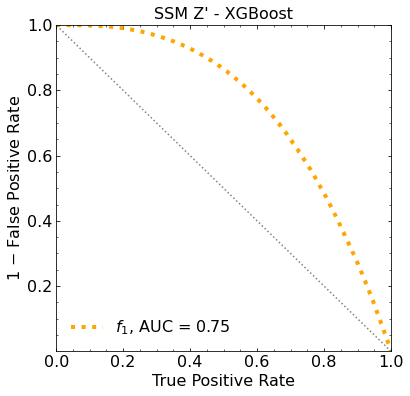


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67910	validation_1-logloss:0.67921
[1]	validation_0-logloss:0.66781	validation_1-logloss:0.66779
[2]	validation_0-logloss:0.65814	validation_1-logloss:0.65821
[3]	validation_0-logloss:0.65000	validation_1-logloss:0.65011
[4]	validation_0-logloss:0.64310	validation_1-logloss:0.64328
[5]	validation_0-logloss:0.63716	validation_1-logloss:0.63735
[6]	validation_0-logloss:0.63213	validation_1-logloss:0.63242
[7]	validation_0-logloss:0.62773	validation_1-logloss:0.62808
[8]	validation_0-logloss:0.62395	validation_1-logloss:0.62438
[9]	validation_0-logloss:0.62075	validation_1-logloss:0.62117
[10]	validation_0-logloss:0.61767	validation_1-logloss:0.61817
[11]	validation_0-logloss:0.61517	validation_1-logloss:0.61570
[12]	validation_0-logloss:0.61287	validation_1-logloss:0.61342
[13]	validation_0-logloss:0.61079	validation_1-logloss:0.61136
[14]	validation_0-logloss:0.60904	validation_1-logloss:0.60967
[15]	validation_0-logloss:0.60749	validation_1-logloss:0.60818
[1

[130]	validation_0-logloss:0.57235	validation_1-logloss:0.57813
[131]	validation_0-logloss:0.57229	validation_1-logloss:0.57811
[132]	validation_0-logloss:0.57225	validation_1-logloss:0.57811
[133]	validation_0-logloss:0.57221	validation_1-logloss:0.57811
[134]	validation_0-logloss:0.57215	validation_1-logloss:0.57811
[135]	validation_0-logloss:0.57211	validation_1-logloss:0.57810
[136]	validation_0-logloss:0.57206	validation_1-logloss:0.57807
[137]	validation_0-logloss:0.57201	validation_1-logloss:0.57806
[138]	validation_0-logloss:0.57198	validation_1-logloss:0.57805
[139]	validation_0-logloss:0.57194	validation_1-logloss:0.57805
[140]	validation_0-logloss:0.57190	validation_1-logloss:0.57805
[141]	validation_0-logloss:0.57188	validation_1-logloss:0.57805
[142]	validation_0-logloss:0.57185	validation_1-logloss:0.57804
[143]	validation_0-logloss:0.57181	validation_1-logloss:0.57804
[144]	validation_0-logloss:0.57170	validation_1-logloss:0.57797
[145]	validation_0-logloss:0.57165	valid

[259]	validation_0-logloss:0.56774	validation_1-logloss:0.57763
[260]	validation_0-logloss:0.56770	validation_1-logloss:0.57763
[261]	validation_0-logloss:0.56767	validation_1-logloss:0.57763
[262]	validation_0-logloss:0.56765	validation_1-logloss:0.57763
[263]	validation_0-logloss:0.56762	validation_1-logloss:0.57763
[264]	validation_0-logloss:0.56759	validation_1-logloss:0.57763
[265]	validation_0-logloss:0.56756	validation_1-logloss:0.57763
[266]	validation_0-logloss:0.56752	validation_1-logloss:0.57763
[267]	validation_0-logloss:0.56748	validation_1-logloss:0.57763


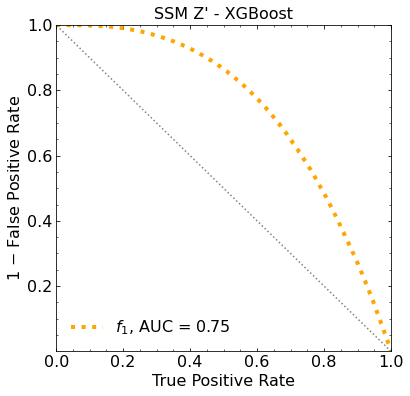


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


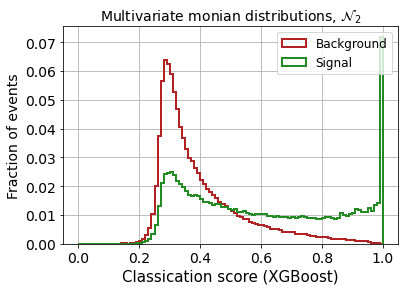

Classification score (10ML):


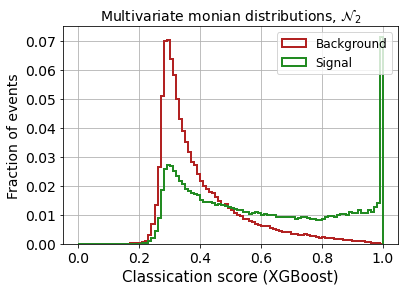

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [16]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]


ntrials = 5000

[2, 5, 8, 12, 25, 37, 50, 125]


### 0. BINNING WITH CROSS-VALIDATION

### Numbers of bins

 BINNING 


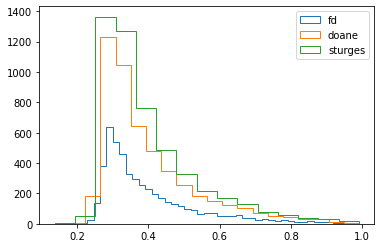

fd 47
doane 20
sturges 15
 


In [17]:
print(' BINNING ')

divs_B = int(len(pred_XG_SM)/B_expected)

B_1 = []
B_2 = []
B_3 = []

for it in range(divs_B):
    datB_grid_SM = pred_XG_SM[(B_expected*it):(B_expected*(it+1))]
    datB_grid_NP = pred_XG_NP[:B_expected]

    B_hist1 = np.histogram_bin_edges(datB_grid_SM, bins = 'fd')
    B_hist2 = np.histogram_bin_edges(datB_grid_SM, bins = 'doane')
    B_hist3 = np.histogram_bin_edges(datB_grid_SM, bins = 'sturges')

    B_1.append(len(B_hist1))
    B_2.append(len(B_hist2))
    B_3.append(len(B_hist3))



B_1_mean = int(np.mean(B_1))
B_2_mean = int(np.mean(B_2))
B_3_mean = int(np.mean(B_3))


B_hist1 = plt.hist(datB_grid_SM, bins = B_1_mean, histtype = 'step', label = 'fd')
B_hist2 = plt.hist(datB_grid_SM, bins = B_2_mean, histtype = 'step', label = 'doane')
B_hist3 = plt.hist(datB_grid_SM, bins = B_3_mean, histtype = 'step', label = 'sturges')
plt.legend()
plt.show()


print('fd', B_1_mean)
print('doane', B_2_mean)
print('sturges', B_3_mean)
print(' ')

B_bins_mean = [B_1_mean, B_2_mean, B_3_mean]

### Binning with cross-validation - equal size bins

In [18]:
# eq size with cross-val method to determine Nbin
Z_bins_XG_CV0 = []
Z_bins_XG_CV1 = []
Z_bins_XG_CV2 = []

Z_bins_XG_CV0_zeros = []
Z_bins_XG_CV1_zeros = []
Z_bins_XG_CV2_zeros = []



for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    
    
    
    
    ###############################
    # EQ SIZE CROSS-VAL FOR Nbins #
    ###############################


    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]

    Z_bins_XG_CV = []
    Z_bins_XG_CV_zeros = []

    for j_it in range(len(B_bins_mean)):

        # bin the parameter space of all background events
        hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(B_bins_mean[j_it]), range = [[min(pred_XG_SM),max(pred_XG_SM)]])
        bin_edges = binedges_back[0]

        if min(hist_back) >= 5*N_ensembles_back:
            print('ok j_it=', j_it)

            # now divide by the number of possible ensembles
            back_prom = hist_back/N_ensembles_back

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
            sig_prom = hist_sig/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_CV_aux = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

        else:
            print('NO ok j_it=', j_it)
            Z_bins_XG_CV_aux = 0

        Z_bins_XG_CV.append(Z_bins_XG_CV_aux)


        # REPLACE the zeros
        hist_back_noceros = []
        for i in range(len(hist_back)):
            if hist_back[i]!=0:
                hist_back_noceros.append(hist_back[i])

        min_back = min(hist_back_noceros)

        # replace the zeros
        for i in range(len(hist_back)):
            if hist_back[i]==0:
                hist_back[i] = min_back

        # now divide by the number of possible ensembles
        back_prom = hist_back/N_ensembles_back

        # same for signal
        hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
        sig_prom = hist_sig/N_ensembles_sig

        Z_bins_XG_CV_zeros.append( ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5 )


    Z_bins_XG_CV0.append(Z_bins_XG_CV[0])
    Z_bins_XG_CV1.append(Z_bins_XG_CV[1])
    Z_bins_XG_CV2.append(Z_bins_XG_CV[2])

    Z_bins_XG_CV0_zeros.append(Z_bins_XG_CV_zeros[0])
    Z_bins_XG_CV1_zeros.append(Z_bins_XG_CV_zeros[1])
    Z_bins_XG_CV2_zeros.append(Z_bins_XG_CV_zeros[2])

    print(' ')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
NO ok j_it= 0
NO ok j_it= 1
NO ok j_it= 2
 


In [19]:
print(Z_bins_XG_CV0)
print(Z_bins_XG_CV1)
print(Z_bins_XG_CV2)

print(Z_bins_XG_CV0_zeros)
print(Z_bins_XG_CV1_zeros)
print(Z_bins_XG_CV2_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.1402861884285593, 0.33497260119760724, 0.5147928719197378, 0.7367315886034335, 1.3640849447422612, 1.8634132288110643, 2.351427270270361, 4.65392245674681]
[0.09267398057453115, 0.22872619282921414, 0.36148337911208506, 0.5338043443490874, 1.062354886187838, 1.5156653063905585, 1.9775423863985897, 4.271857878010959]
[0.08165695043200914, 0.2024619527017751, 0.32134734437024687, 0.47704806944692896, 0.9632116945276903, 1.3887810009176293, 1.8288642249659461, 4.074045826886028]


In [ ]:
Z_bins_XG_CV0 = 
Z_bins_XG_CV1 = 
Z_bins_XG_CV2 = 

Z_bins_XG_CV0_zeros = 
Z_bins_XG_CV1_zeros = 
Z_bins_XG_CV2_zeros = 

<ipython-input-20-b6791d54c268>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd')
<ipython-input-20-b6791d54c268>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')
<ipython-input-20-b6791d54c268>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges')
<ipython-input-20-b6791d54c268>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argum

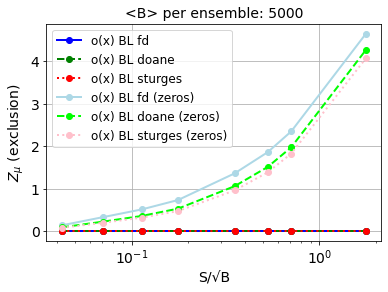

In [20]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')  
plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV0_zeros, '-ok', color='lightblue', lw=lw, label='o(x) BL fd (zeros)') 
plt.plot(posX, Z_bins_XG_CV1_zeros, '--ok', color='lime', lw=lw, label='o(x) BL doane (zeros)') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':ok', color='pink', lw=lw, label='o(x) BL sturges (zeros)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Binning with cross-validation - non-equal size bins

In [21]:
########################################################################
# RANDOM BINNING with CROSS-VAL FOR Nbins and CROSS-VAL for the random #
########################################################################

num_SM = int(len(pred_XG_SM)/6)
num_NP = int(len(pred_XG_NP)/6)

numdat = min(num_SM, num_NP)

data_grid_SM_0 = pred_XG_SM[(0*numdat):(1*numdat)]
data_grid_NP_0 = pred_XG_NP[(0*numdat):(1*numdat)]

data_grid_SM_1 = pred_XG_SM[(1*numdat):(2*numdat)]
data_grid_NP_1 = pred_XG_NP[(1*numdat):(2*numdat)]

data_grid_SM_2 = pred_XG_SM[(2*numdat):(3*numdat)]
data_grid_NP_2 = pred_XG_NP[(2*numdat):(3*numdat)]

data_grid_SM_3 = pred_XG_SM[(3*numdat):(4*numdat)]
data_grid_NP_3 = pred_XG_NP[(3*numdat):(4*numdat)]

data_grid_SM_4 = pred_XG_SM[(4*numdat):(5*numdat)]
data_grid_NP_4 = pred_XG_NP[(4*numdat):(5*numdat)]

data_grid_SM_5 = pred_XG_SM[(5*numdat):(6*numdat)]
data_grid_NP_5 = pred_XG_NP[(5*numdat):(6*numdat)]



# cross-val method to determine the random binning
CV0_chi2 = []
CV1_chi2 = []
CV2_chi2 = []

CV0_chi2_N = []
CV1_chi2_N = []
CV2_chi2_N = []

CV0_MSE = []
CV1_MSE = []
CV2_MSE = []

CV0_poiss = []
CV1_poiss = []
CV2_poiss = []


CV0_chi2_eqsize = []
CV1_chi2_eqsize = []
CV2_chi2_eqsize = []

CV0_chi2_N_eqsize = []
CV1_chi2_N_eqsize = []
CV2_chi2_N_eqsize = []

CV0_MSE_eqsize = []
CV1_MSE_eqsize = []
CV2_MSE_eqsize = []

CV0_poiss_eqsize = []
CV1_poiss_eqsize = []
CV2_poiss_eqsize = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2 = []
Z_bins_XG_CV1_chi2 = []
Z_bins_XG_CV2_chi2 = []

Z_bins_XG_CV0_chi2_N = []
Z_bins_XG_CV1_chi2_N = []
Z_bins_XG_CV2_chi2_N = []

Z_bins_XG_CV0_MSE = []
Z_bins_XG_CV1_MSE = []
Z_bins_XG_CV2_MSE = []

Z_bins_XG_CV0_poiss = []
Z_bins_XG_CV1_poiss = []
Z_bins_XG_CV2_poiss = []


# THE SAME but replacin the zeros in the binning

# cross-val method to determine the random binning
CV0_chi2_zeros = []
CV1_chi2_zeros = []
CV2_chi2_zeros = []

CV0_chi2_N_zeros = []
CV1_chi2_N_zeros = []
CV2_chi2_N_zeros = []

CV0_MSE_zeros = []
CV1_MSE_zeros = []
CV2_MSE_zeros = []

CV0_poiss_zeros = []
CV1_poiss_zeros = []
CV2_poiss_zeros = []


CV0_chi2_eqsize_zeros = []
CV1_chi2_eqsize_zeros = []
CV2_chi2_eqsize_zeros = []

CV0_chi2_N_eqsize_zeros = []
CV1_chi2_N_eqsize_zeros = []
CV2_chi2_N_eqsize_zeros = []

CV0_MSE_eqsize_zeros = []
CV1_MSE_eqsize_zeros = []
CV2_MSE_eqsize_zeros = []

CV0_poiss_eqsize_zeros = []
CV1_poiss_eqsize_zeros = []
CV2_poiss_eqsize_zeros = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2_zeros = []
Z_bins_XG_CV1_chi2_zeros = []
Z_bins_XG_CV2_chi2_zeros = []

Z_bins_XG_CV0_chi2_N_zeros = []
Z_bins_XG_CV1_chi2_N_zeros = []
Z_bins_XG_CV2_chi2_N_zeros = []

Z_bins_XG_CV0_MSE_zeros = []
Z_bins_XG_CV1_MSE_zeros = []
Z_bins_XG_CV2_MSE_zeros = []

Z_bins_XG_CV0_poiss_zeros = []
Z_bins_XG_CV1_poiss_zeros = []
Z_bins_XG_CV2_poiss_zeros = []




for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    Z_bins_XG_CV_rd = []

    chi2 = []
    chi2_N = []
    MSE = []
    poiss = []


    Z_bins_XG_CV_rd_zeros = []

    chi2_zeros = []
    chi2_N_zeros = []
    MSE_zeros = []
    poiss_zeros = []


    # Les't find the number of possible ensembles
    N_ensembles_back = len(data_grid_SM_0) / B_expected
    N_ensembles_sig = len(data_grid_NP_0) / S_expected[iii]



    for j_it in range(len(B_bins_mean)):

        print('doing Nbin: ', B_bins_mean[j_it])

        for i_it in range(ntrials):

            if i_it == 0:
                # bin the parameter space of all background events
                bin_edges = np.linspace( min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]+1) )

            else:
                bin_edges = np.hstack( (min(pred_XG_SM), np.sort( np.random.uniform(min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]-1)) ), max(pred_XG_SM) ) )

            hist_SM_0, _ = np.histogramdd([data_grid_SM_0], bins = [bin_edges])
            hist_SM_1, _ = np.histogramdd([data_grid_SM_1], bins = [bin_edges])
            hist_SM_2, _ = np.histogramdd([data_grid_SM_2], bins = [bin_edges])
            hist_SM_3, _ = np.histogramdd([data_grid_SM_3], bins = [bin_edges])

            mean = (hist_SM_0 + hist_SM_1 + hist_SM_2 + hist_SM_3 )/4

            if min(mean)>= 5*N_ensembles_back:

                ##################
                # COMPUTE METRIC #
                ##################
                hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

                aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
                aux_chi2_N = aux_chi2 / j_it
                aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
                aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


                #############
                # COMPUTE Z #
                #############
                # bin the parameter space of all background events
                hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

                # now divide by the number of possible ensembles
                back_prom_5 = hist_SM_5/N_ensembles_back

                # same for signal
                hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

                sig_prom_5 = hist_NP_5/N_ensembles_sig

                # then the signif Z^binned-Asimov:
                Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            else:
                Z_bins_XG_aux = 0
                aux_chi2 = 9999
                aux_chi2_N = 9999
                aux_MSE = 9999
                aux_poiss = 9999

            Z_bins_XG_CV_rd.append(Z_bins_XG_aux)
            chi2.append(aux_chi2)
            chi2_N.append(aux_chi2_N)
            MSE.append(aux_MSE)
            poiss.append(aux_poiss)



            # REPLACE the zeros
            mean_noceros = []
            for i in range(len(mean)):
                if mean[i]!=0:
                    mean_noceros.append(mean[i])

            min_mean = min(mean_noceros)

            # replace the zeros
            for i in range(len(mean)):
                if mean[i]==0:
                    mean[i] = min_mean


            ##################
            # COMPUTE METRIC #
            ##################
            hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]!=0:
                    hist_back_noceros.append(hist_SM_4[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]==0:
                    hist_SM_4[i] = min_back

            aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
            aux_chi2_N = aux_chi2 / j_it
            aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
            aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


            #############
            # COMPUTE Z #
            #############
            # bin the parameter space of all background events
            hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]!=0:
                    hist_back_noceros.append(hist_SM_5[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]==0:
                    hist_SM_5[i] = min_back

            # now divide by the number of possible ensembles
            back_prom_5 = hist_SM_5/N_ensembles_back

            # same for signal
            hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

            sig_prom_5 = hist_NP_5/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            Z_bins_XG_CV_rd_zeros.append(Z_bins_XG_aux)
            chi2_zeros.append(aux_chi2)
            chi2_N_zeros.append(aux_chi2_N)
            MSE_zeros.append(aux_MSE)
            poiss_zeros.append(aux_poiss)




    ################################################
    # SELECT THE BINNING with MINIMUM METRIC VALUE #
    ################################################

    # the value of the metric
    chi2_per_bin = []
    chi2_N_per_bin = []
    MSE_per_bin = []
    poiss_per_bin = []

    chi2_per_bin_eqsize = []
    chi2_N_per_bin_eqsize = []
    MSE_per_bin_eqsize = []
    poiss_per_bin_eqsize = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin.append( np.min(chi2[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin.append( np.min(chi2_N[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin.append( np.min(MSE[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin.append( np.min(poiss[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize.append( chi2[ntrials*i] )
        chi2_N_per_bin_eqsize.append( chi2_N[ntrials*i] )
        MSE_per_bin_eqsize.append( MSE[ntrials*i] )
        poiss_per_bin_eqsize.append( poiss[ntrials*i] )


    CV0_chi2.append(chi2_per_bin[0])
    CV1_chi2.append(chi2_per_bin[1])
    CV2_chi2.append(chi2_per_bin[2])

    CV0_chi2_N.append(chi2_N_per_bin[0])
    CV1_chi2_N.append(chi2_N_per_bin[1])
    CV2_chi2_N.append(chi2_N_per_bin[2])

    CV0_MSE.append(MSE_per_bin[0])
    CV1_MSE.append(MSE_per_bin[1])
    CV2_MSE.append(MSE_per_bin[2])

    CV0_poiss.append(poiss_per_bin[0])
    CV1_poiss.append(poiss_per_bin[1])
    CV2_poiss.append(poiss_per_bin[2])



    CV0_chi2_eqsize.append(chi2_per_bin_eqsize[0])
    CV1_chi2_eqsize.append(chi2_per_bin_eqsize[1])
    CV2_chi2_eqsize.append(chi2_per_bin_eqsize[2])

    CV0_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[0])
    CV1_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[1])
    CV2_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[2])

    CV0_MSE_eqsize.append(MSE_per_bin_eqsize[0])
    CV1_MSE_eqsize.append(MSE_per_bin_eqsize[1])
    CV2_MSE_eqsize.append(MSE_per_bin_eqsize[2])

    CV0_poiss_eqsize.append(poiss_per_bin_eqsize[0])
    CV1_poiss_eqsize.append(poiss_per_bin_eqsize[1])
    CV2_poiss_eqsize.append(poiss_per_bin_eqsize[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin = []
    Z_chi2_N_per_bin = []
    Z_MSE_per_bin = []
    Z_poiss_per_bin = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2_N[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin.append( Z_bins_XG_CV_rd[np.argmin(MSE[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin.append( Z_bins_XG_CV_rd[np.argmin(poiss[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2.append(Z_chi2_per_bin[0])
    Z_bins_XG_CV1_chi2.append(Z_chi2_per_bin[1])
    Z_bins_XG_CV2_chi2.append(Z_chi2_per_bin[2])

    Z_bins_XG_CV0_chi2_N.append(Z_chi2_N_per_bin[0])
    Z_bins_XG_CV1_chi2_N.append(Z_chi2_N_per_bin[1])
    Z_bins_XG_CV2_chi2_N.append(Z_chi2_N_per_bin[2])

    Z_bins_XG_CV0_MSE.append(Z_MSE_per_bin[0])
    Z_bins_XG_CV1_MSE.append(Z_MSE_per_bin[1])
    Z_bins_XG_CV2_MSE.append(Z_MSE_per_bin[2])

    Z_bins_XG_CV0_poiss.append(Z_poiss_per_bin[0])
    Z_bins_XG_CV1_poiss.append(Z_poiss_per_bin[1])
    Z_bins_XG_CV2_poiss.append(Z_poiss_per_bin[2])




    # SAME for replacing the zeros in the binning
    # the value of the metric
    chi2_per_bin_zeros = []
    chi2_N_per_bin_zeros = []
    MSE_per_bin_zeros = []
    poiss_per_bin_zeros = []

    chi2_per_bin_eqsize_zeros = []
    chi2_N_per_bin_eqsize_zeros = []
    MSE_per_bin_eqsize_zeros = []
    poiss_per_bin_eqsize_zeros = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin_zeros.append( np.min(chi2_zeros[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin_zeros.append( np.min(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin_zeros.append( np.min(MSE_zeros[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin_zeros.append( np.min(poiss_zeros[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize_zeros.append( chi2_zeros[ntrials*i] )
        chi2_N_per_bin_eqsize_zeros.append( chi2_N_zeros[ntrials*i] )
        MSE_per_bin_eqsize_zeros.append( MSE_zeros[ntrials*i] )
        poiss_per_bin_eqsize_zeros.append( poiss_zeros[ntrials*i] )


    CV0_chi2_zeros.append(chi2_per_bin_zeros[0])
    CV1_chi2_zeros.append(chi2_per_bin_zeros[1])
    CV2_chi2_zeros.append(chi2_per_bin_zeros[2])

    CV0_chi2_N_zeros.append(chi2_N_per_bin_zeros[0])
    CV1_chi2_N_zeros.append(chi2_N_per_bin_zeros[1])
    CV2_chi2_N_zeros.append(chi2_N_per_bin_zeros[2])

    CV0_MSE_zeros.append(MSE_per_bin_zeros[0])
    CV1_MSE_zeros.append(MSE_per_bin_zeros[1])
    CV2_MSE_zeros.append(MSE_per_bin_zeros[2])

    CV0_poiss_zeros.append(poiss_per_bin_zeros[0])
    CV1_poiss_zeros.append(poiss_per_bin_zeros[1])
    CV2_poiss_zeros.append(poiss_per_bin_zeros[2])



    CV0_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[0])
    CV1_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[1])
    CV2_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[2])

    CV0_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[0])
    CV1_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[1])
    CV2_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[2])

    CV0_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[0])
    CV1_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[1])
    CV2_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[2])

    CV0_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[0])
    CV1_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[1])
    CV2_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin_zeros = []
    Z_chi2_N_per_bin_zeros = []
    Z_MSE_per_bin_zeros = []
    Z_poiss_per_bin_zeros = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(MSE_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(poiss_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2_zeros.append(Z_chi2_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_zeros.append(Z_chi2_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_zeros.append(Z_chi2_per_bin_zeros[2])

    Z_bins_XG_CV0_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[2])

    Z_bins_XG_CV0_MSE_zeros.append(Z_MSE_per_bin_zeros[0])
    Z_bins_XG_CV1_MSE_zeros.append(Z_MSE_per_bin_zeros[1])
    Z_bins_XG_CV2_MSE_zeros.append(Z_MSE_per_bin_zeros[2])

    Z_bins_XG_CV0_poiss_zeros.append(Z_poiss_per_bin_zeros[0])
    Z_bins_XG_CV1_poiss_zeros.append(Z_poiss_per_bin_zeros[1])
    Z_bins_XG_CV2_poiss_zeros.append(Z_poiss_per_bin_zeros[2])
    
    print(' ')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
doing Nbin:  47


<ipython-input-21-31abcaeaab5c>:266: RuntimeWarning: divide by zero encountered in double_scalars
  aux_chi2_N = aux_chi2 / j_it
<ipython-input-21-31abcaeaab5c>:267: RuntimeWarning: divide by zero encountered in double_scalars
  aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it


doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
doing Nbin:  47
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
doing Nbin:  47
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
doing Nbin:  47
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
doing Nbin:  47
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
doing Nbin:  47
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
doing Nbin:  47
doing Nbin:  20
doing Nbin:  15
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
doing Nbin:  47
doing Nbin:  20
doing Nbin:  15
 


In [22]:
print(Z_bins_XG_CV0_chi2)
print(Z_bins_XG_CV1_chi2)
print(Z_bins_XG_CV2_chi2)

print(Z_bins_XG_CV0_chi2_N)
print(Z_bins_XG_CV1_chi2_N)
print(Z_bins_XG_CV2_chi2_N)

print(Z_bins_XG_CV0_MSE)
print(Z_bins_XG_CV1_MSE)
print(Z_bins_XG_CV2_MSE)

print(Z_bins_XG_CV0_poiss)
print(Z_bins_XG_CV1_poiss)
print(Z_bins_XG_CV2_poiss)



print(Z_bins_XG_CV0_chi2_zeros)
print(Z_bins_XG_CV1_chi2_zeros)
print(Z_bins_XG_CV2_chi2_zeros)

print(Z_bins_XG_CV0_chi2_N_zeros)
print(Z_bins_XG_CV1_chi2_N_zeros)
print(Z_bins_XG_CV2_chi2_N_zeros)

print(Z_bins_XG_CV0_MSE_zeros)
print(Z_bins_XG_CV1_MSE_zeros)
print(Z_bins_XG_CV2_MSE_zeros)

print(Z_bins_XG_CV0_poiss_zeros)
print(Z_bins_XG_CV1_poiss_zeros)
print(Z_bins_XG_CV2_poiss_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.07092260610242077, 0.20653671048137207, 0.29390510836795947, 0.4368209696092683, 0.889162964085933, 1.2157065309297752, 1.8134934127462023, 3.911543323594492]
[0.07320478611805345, 0.2083409983160493, 0.2525772682198559, 0.37491692604892907, 0.8110582827950542, 1.4048740942512787, 1.5245881558028227, 3.6285083362313433]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.07092260610242077, 0.20653671048137207, 0.29390510836795947, 0.4368209696092683, 0.889162964085933, 1.2157065309297752, 1.8134934127462023, 3.911543323594492]
[0.07320478611805345, 0.2083409983160493, 0.2525772682198559, 0.37491692604892907, 0.8110582827950542, 1.4048740942512787, 1.5245881558028227, 3.6285083362313433]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.07062030650707118, 0.14591117233405315, 0.29263647928139197, 0.37455894341278806, 0.922877700698103, 1.3820697960596335, 1.71094134919461, 3.2342434803148397]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.07092260610242077, 0.20653671048137207, 0.29390510836795947,

In [ ]:
Z_bins_XG_CV0_chi2 = 
Z_bins_XG_CV1_chi2 = 
Z_bins_XG_CV2_chi2 = 

Z_bins_XG_CV0_chi2_N = 
Z_bins_XG_CV1_chi2_N = 
Z_bins_XG_CV2_chi2_N = 

Z_bins_XG_CV0_MSE = 
Z_bins_XG_CV1_MSE = 
Z_bins_XG_CV2_MSE = 

Z_bins_XG_CV0_poiss = 
Z_bins_XG_CV1_poiss = 
Z_bins_XG_CV2_poiss = 



Z_bins_XG_CV0_chi2_zeros = 
Z_bins_XG_CV1_chi2_zeros = 
Z_bins_XG_CV2_chi2_zeros = 

Z_bins_XG_CV0_chi2_N_zeros = 
Z_bins_XG_CV1_chi2_N_zeros = 
Z_bins_XG_CV2_chi2_N_zeros = 

Z_bins_XG_CV0_MSE_zeros = 
Z_bins_XG_CV1_MSE_zeros = 
Z_bins_XG_CV2_MSE_zeros = 

Z_bins_XG_CV0_poiss_zeros = 
Z_bins_XG_CV1_poiss_zeros = 
Z_bins_XG_CV2_poiss_zeros = 

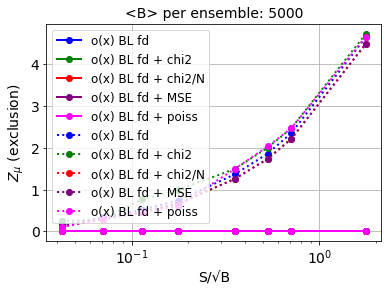

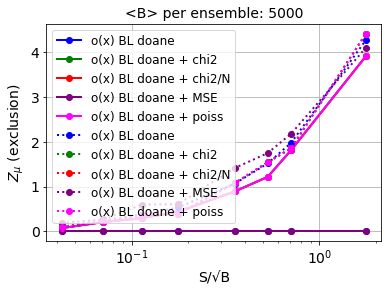

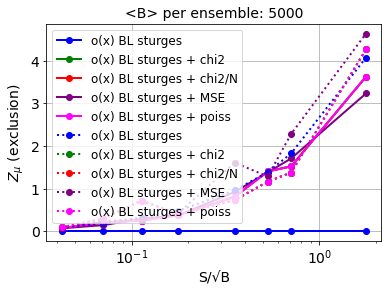

In [23]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2, '-o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N, '-o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE, '-o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss, '-o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 
plt.plot(posX, Z_bins_XG_CV0_zeros, ':o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()





plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV1, '-o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2, '-o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N, '-o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE, '-o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss, '-o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 
plt.plot(posX, Z_bins_XG_CV1_zeros, ':o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV2, '-o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2, '-o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N, '-o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE, '-o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss, '-o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.3438659432820467
Z_bins_logbins :  0.33047718413087723

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  0.6385667624765532
Z_bins_logbins :  0.6316819235799386

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  0.8651057015891381
Z_bins_logbins :  0.8621006049641237

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  1.1196111006230796
Z_bins_logbins :  1.1193852591248268

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  1.7806366610936035
Z_bins_logbins :  1.7825566957588639

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  2.2849839704078065
Z_bins_logbins :  2.2859327829915

In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.3438659432820467, 0.6385667624765532, 0.8651057015891381, 1.1196111006230796, 1.7806366610936035, 2.2849839704078065, 2.772626335072859, 5.0705680090737895]
[0.33047718413087723, 0.6316819235799386, 0.8621006049641237, 1.1193852591248268, 1.7825566957588639, 2.285932782991559, 2.771636892728731, 5.05658154842496]


In [24]:
store_Z_bins = [0.3438659432820467, 0.6385667624765532, 0.8651057015891381, 1.1196111006230796, 1.7806366610936035, 2.2849839704078065, 2.772626335072859, 5.0705680090737895]

store_Z_bins_logbins = [0.33047718413087723, 0.6316819235799386, 0.8621006049641237, 1.1193852591248268, 1.7825566957588639, 2.285932782991559, 2.771636892728731, 5.05658154842496]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


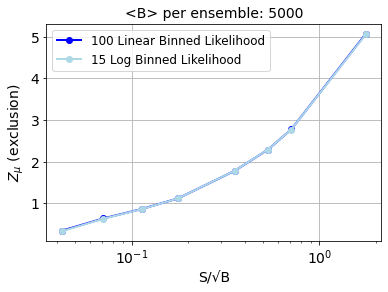

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.2182037690848985
Z_bins_XG_15bins :  0.08207869050033911
Z_bins_XG_15bins_1ML :  0.07937603366337344
Z_bins_XG_15bins_eq :  0.046542817083952026
Z_bins_XG_15bins_eq_1ML :  0.04655725009683605

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.4848553831707517
Z_bins_XG_15bins :  0.20363761837708366
Z_bins_XG_15bins_1ML :  0.19705454021206759
Z_bins_XG_15bins_eq :  0.11624467515736275
Z_bins_XG_15bins_eq_1ML :  0.11628062431212564

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  0.7094982405686843
Z_bins_XG_15bins :  0.3234074019654743
Z_bins_XG_15bins_1ML :  0.3131379265818108
Z_bins_XG_15bins_eq :  0.18581240997567028
Z_bins_XG_15bins_eq_1ML :  0.18586971659342333

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.2182037690848985, 0.4848553831707517, 0.7094982405686843, 0.9697198387902283, 1.6539477780625962, 2.173937969774441, 2.6735465919258807, 5.000771719505375]
[0.08207869050033911, 0.20363761837708366, 0.3234074019654743, 0.48046442998770345, 0.9721108399366205, 1.4037331561285464, 1.850999703928712, 4.140200576821974]
[0.07937603366337344, 0.19705454021206759, 0.3131379265818108, 0.4655566123649867, 0.9439872727888465, 1.3654324848457773, 1.8033410902084708, 4.057978450209219]
[0.046542817083952026, 0.11624467515736275, 0.18581240997567028, 0.27836213590467984, 0.5775343459882446, 0.8515429380976887, 1.1461124983868134, 2.802163755472743]
[0.04655725009683605, 0.11628062431212564, 0.18586971659342333, 0.27844767493630873, 0.5777097534034495, 0.8517988166324055, 1.1464529675652, 2.802944742420346]


In [25]:
store_Z_bins_XG = [0.2182037690848985, 0.4848553831707517, 0.7094982405686843, 0.9697198387902283, 1.6539477780625962, 2.173937969774441, 2.6735465919258807, 5.000771719505375]

store_Z_bins_XG_15bins = [0.08207869050033911, 0.20363761837708366, 0.3234074019654743, 0.48046442998770345, 0.9721108399366205, 1.4037331561285464, 1.850999703928712, 4.140200576821974]
store_Z_bins_XG_15bins_1ML = [0.07937603366337344, 0.19705454021206759, 0.3131379265818108, 0.4655566123649867, 0.9439872727888465, 1.3654324848457773, 1.8033410902084708, 4.057978450209219]

store_Z_bins_XG_15bins_eq = [0.046542817083952026, 0.11624467515736275, 0.18581240997567028, 0.27836213590467984, 0.5775343459882446, 0.8515429380976887, 1.1461124983868134, 2.802163755472743]
store_Z_bins_XG_15bins_eq_1ML = [0.04655725009683605, 0.11628062431212564, 0.18586971659342333, 0.27844767493630873, 0.5777097534034495, 0.8517988166324055, 1.1464529675652, 2.802944742420346]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

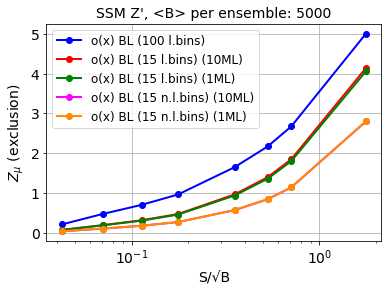

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf  9146.07825634  9149.15640318  9149.33578322
  9140.25763025  9110.32811936  9025.43809917  8815.39134141
  8407.67911955  7756.64210911  6829.57292893  5575.0612201
  3919.80945798  1768.22289653 -1028.66375744 -4346.1555719 ]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf  4097.71895582
  4005.00067616  3881.98994433  3741.79845092  3589.21856426
  3428.58814482  3260.20786177  3066.93366396  2821.9017258
  2498.00820031  2076.63199035  1514.6928987    787.69088393
  -133.05418523 -1234.47570702 -2558.25410334 -5016.67038151]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.003030951223220623, kernel='epanechnikov')


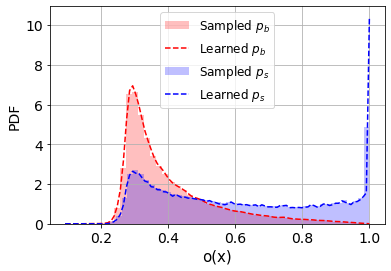


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



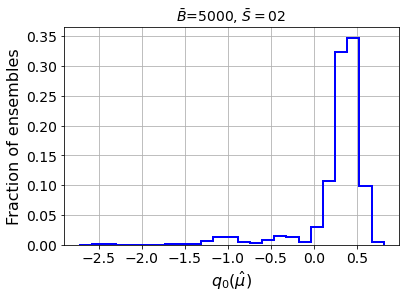

muhat mean:  0.009560832107585628
median q_muhat:  0.37301932335562293
Z_KDE:  0.610753078875271
Z_KDE mu=0:  0.610753078875271

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



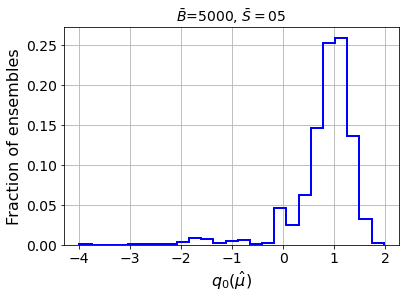

muhat mean:  0.04710952280849275
median q_muhat:  0.9557284777997417
Z_KDE:  0.9776136649002722
Z_KDE mu=0:  0.9776136649002722

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



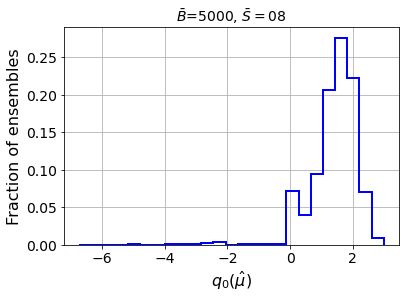

muhat mean:  0.060983813327727565
median q_muhat:  1.5476897769493476
Z_KDE:  1.2440618059201671
Z_KDE mu=0:  1.2440618059201671

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



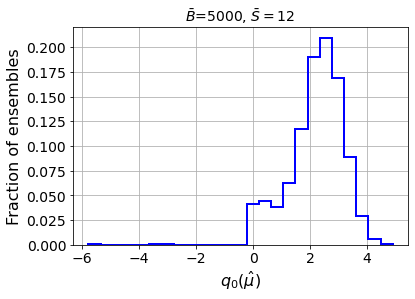

muhat mean:  0.0575572840025226
median q_muhat:  2.348896435113325
Z_KDE:  1.5326109862301407
Z_KDE mu=0:  1.5326109862301407

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



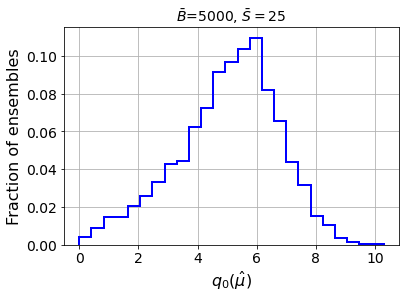

muhat mean:  0.030885756364401433
median q_muhat:  5.228954403092082
Z_KDE:  2.2866907099763365
Z_KDE mu=0:  2.2866907099763365

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



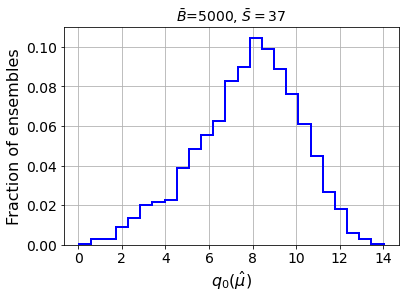

muhat mean:  0.02500526205009472
median q_muhat:  8.014136970870425
Z_KDE:  2.830925108665085
Z_KDE mu=0:  2.830925108665085

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



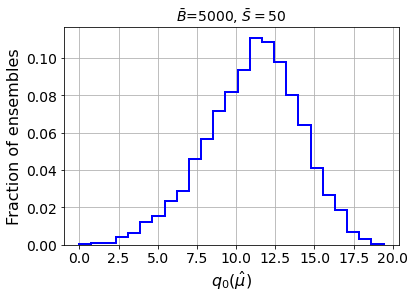

muhat mean:  0.019246949936895245
median q_muhat:  11.255399850802824
Z_KDE:  3.3549068319109585
Z_KDE mu=0:  3.3542973190010903

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



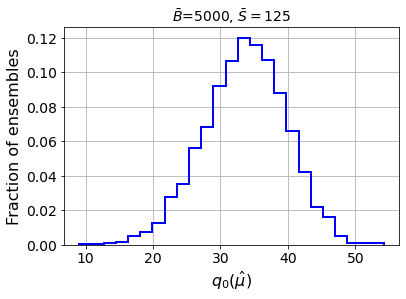

muhat mean:  0.010539629005059023
median q_muhat:  33.804963147594464
Z_KDE:  5.814203569500681
Z_KDE mu=0:  5.815093771514629

 ----------------------------------------- 



In [19]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [20]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.610753078875271, 0.9776136649002722, 1.2440618059201671, 1.5326109862301407, 2.2866907099763365, 2.830925108665085, 3.3549068319109585, 5.814203569500681]
[0.610753078875271, 0.9776136649002722, 1.2440618059201671, 1.5326109862301407, 2.2866907099763365, 2.830925108665085, 3.3542973190010903, 5.815093771514629]
[0.009560832107585628, 0.04710952280849275, 0.060983813327727565, 0.0575572840025226, 0.030885756364401433, 0.02500526205009472, 0.019246949936895245, 0.010539629005059023]


In [26]:
store_Z_MLL_KDE = [0.610753078875271, 0.9776136649002722, 1.2440618059201671, 1.5326109862301407, 2.2866907099763365, 2.830925108665085, 3.3549068319109585, 5.814203569500681]
store_Z_MLL_KDE_mu0 = [0.610753078875271, 0.9776136649002722, 1.2440618059201671, 1.5326109862301407, 2.2866907099763365, 2.830925108665085, 3.3542973190010903, 5.815093771514629]

store_muhat_mean_MLL = [0.009560832107585628, 0.04710952280849275, 0.060983813327727565, 0.0575572840025226, 0.030885756364401433, 0.02500526205009472, 0.019246949936895245, 0.010539629005059023]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf  8548.89978754  8549.69574896
  8545.16222718  8526.8714458   8467.93242014  8313.30538797
  7984.22990073  7418.66283185  6576.76037066  5398.31315074
  3795.8035276   1693.08896257 -1063.34326945 -4361.56546012]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
  3817.19916762  3683.14662751  3539.32127605  3391.0960531
  3230.50024822  3064.3063881   2873.46293106  2647.45610749
  2354.23520691  1962.24985364  1421.59593127   711.59466876
  -198.02732289 -1289.43850518 -2597.76785436 -5033.12363328]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


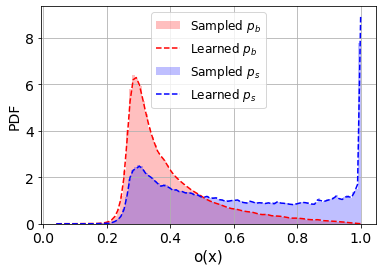


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.3114196627835153

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



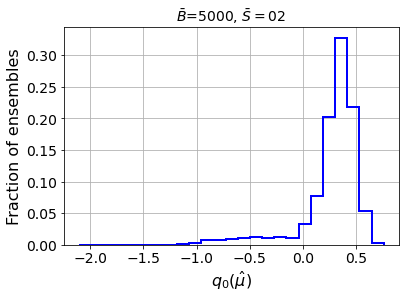

muhat mean:  0.01252363942004623
median q_muhat:  0.33521644098930636
Z_KDE:  0.5789787914848923
Z_KDE mu=0:  0.5789787914848923

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.6462535306809122

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



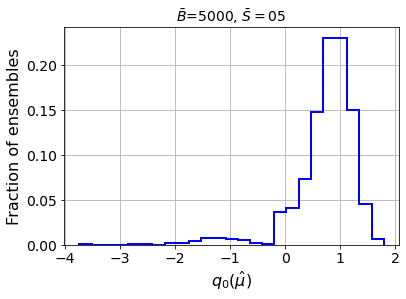

muhat mean:  0.04986335926003784
median q_muhat:  0.8504843866727168
Z_KDE:  0.9222171038712721
Z_KDE mu=0:  0.9222171038712721

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  0.9108378010435879

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



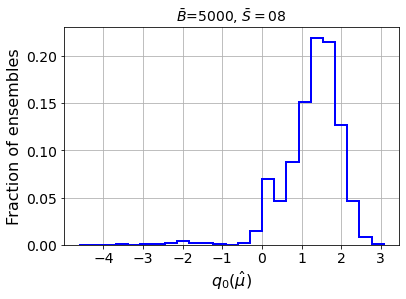

muhat mean:  0.06375867143157453
median q_muhat:  1.4031050425217853
Z_KDE:  1.1845273498411868
Z_KDE mu=0:  1.1845273498411868

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  1.2070784790100964

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



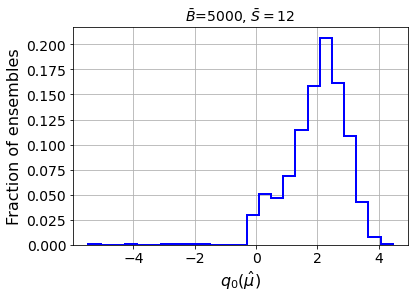

muhat mean:  0.05801976035316376
median q_muhat:  2.126522911138906
Z_KDE:  1.458260234367963
Z_KDE mu=0:  1.458260234367963

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  1.9610983937178175

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



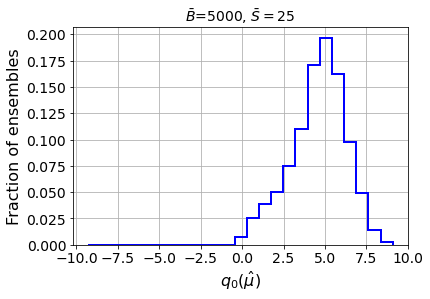

muhat mean:  0.03395750052598359
median q_muhat:  4.772773156998866
Z_KDE:  2.184667745218679
Z_KDE mu=0:  2.184667745218679

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  2.5222670615261475

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



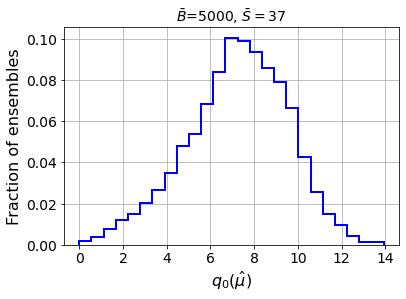

muhat mean:  0.023384550620921915
median q_muhat:  7.366220242715244
Z_KDE:  2.714078157075666
Z_KDE mu=0:  2.714078157075666

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  3.055966603476268

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



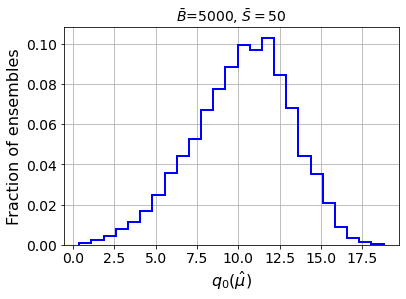

muhat mean:  0.020004206983592763
median q_muhat:  10.471203268278302
Z_KDE:  3.2359238662672984
Z_KDE mu=0:  3.2357157744430425

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  5.499499109246215

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



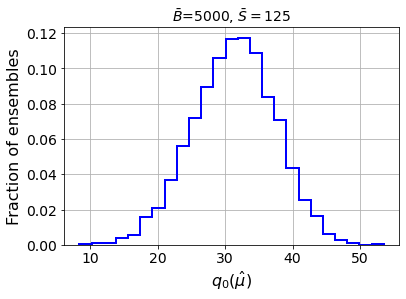

muhat mean:  0.011256323777403036
median q_muhat:  31.530238105182633
Z_KDE:  5.615179258508372
Z_KDE mu=0:  5.61633410632913

 ----------------------------------------- 



In [21]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [22]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.3114196627835153, 0.6462535306809122, 0.9108378010435879, 1.2070784790100964, 1.9610983937178175, 2.5222670615261475, 3.055966603476268, 5.499499109246215]
[0.5789787914848923, 0.9222171038712721, 1.1845273498411868, 1.458260234367963, 2.184667745218679, 2.714078157075666, 3.2359238662672984, 5.615179258508372]
[0.5789787914848923, 0.9222171038712721, 1.1845273498411868, 1.458260234367963, 2.184667745218679, 2.714078157075666, 3.2357157744430425, 5.61633410632913]
[0.01252363942004623, 0.04986335926003784, 0.06375867143157453, 0.05801976035316376, 0.03395750052598359, 0.023384550620921915, 0.020004206983592763, 0.011256323777403036]


In [27]:
store_Z_KDE_bins = [0.3114196627835153, 0.6462535306809122, 0.9108378010435879, 1.2070784790100964, 1.9610983937178175, 2.5222670615261475, 3.055966603476268, 5.499499109246215]

store_Z_MLL_KDE_1ML = [0.5789787914848923, 0.9222171038712721, 1.1845273498411868, 1.458260234367963, 2.184667745218679, 2.714078157075666, 3.2359238662672984, 5.615179258508372]
store_Z_MLL_KDE_mu0_1ML = [0.5789787914848923, 0.9222171038712721, 1.1845273498411868, 1.458260234367963, 2.184667745218679, 2.714078157075666, 3.2357157744430425, 5.61633410632913]

store_muhat_mean_MLL_1ML = [0.01252363942004623, 0.04986335926003784, 0.06375867143157453, 0.05801976035316376, 0.03395750052598359, 0.023384550620921915, 0.020004206983592763, 0.011256323777403036]

<ipython-input-23-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-23-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


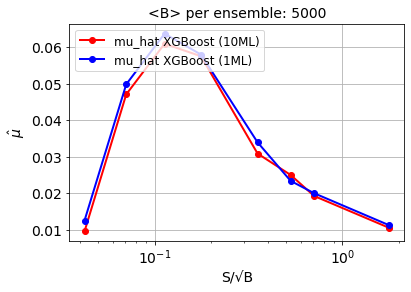

<ipython-input-23-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-23-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-23-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-23-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

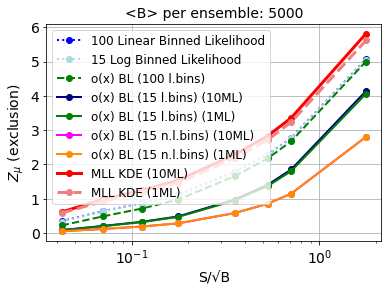

In [23]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [28]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.028350850812707565
WP:  0.5     S/B**0.5=  0.036796937922375435
WP:  0.75     S/B**0.5=  0.04671647412405203
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.07087712615238398
WP:  0.5     S/B**0.5=  0.09199206344812787
WP:  0.75     S/B**0.5=  0.11679017075561487
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.11340339762269921
WP:  0.5     S/B**0.5=  0.14718802736803943
WP:  0.75     S/B**0.5=  0.18686651278527108
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.17010508799158247
WP:  0.5     S/B**0.5=  0.22078089726561514
WP:  0.75     S/B**0.5=  0.28029713882635005
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.35438556480383376
WP:  0.5     S/B**0.5=  0.459

In [29]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.028350850812707565, 0.07087712615238398, 0.11340339762269921, 0.17010508799158247, 0.35438556480383376, 0.5244906684502963, 0.7087711296076675, 1.7719267244322003]
SrootB_WP1_XG = [0.036796937922375435, 0.09199206344812787, 0.14718802736803943, 0.22078089726561514, 0.4599554366313653, 0.6807396552687934, 0.9199108732627306, 2.299733678779721]
SrootB_WP2_XG = [0.04671647412405203, 0.11679017075561487, 0.18686651278527108, 0.28029713882635005, 0.5839414122313035, 0.8642489089281713, 1.167882824462607, 2.9196978127790763]

<ipython-input-26-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-26-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-26-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-26-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

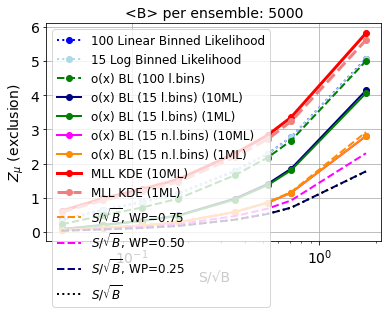

In [26]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-27-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


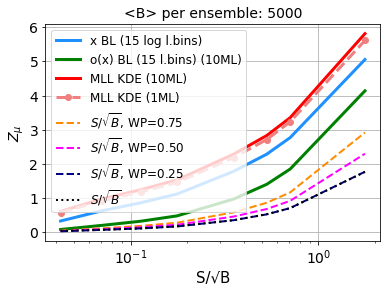

In [27]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

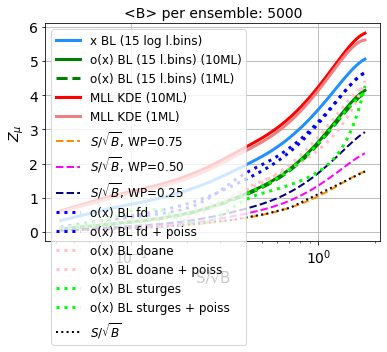

In [33]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


fcubic_bins_XG_CV0 = interp1d(posX, Z_bins_XG_CV0, kind='cubic')
fcubic_bins_XG_CV0_chi2 = interp1d(posX, Z_bins_XG_CV0_chi2, kind='cubic')
fcubic_bins_XG_CV0_chi2_N = interp1d(posX, Z_bins_XG_CV0_chi2_N, kind='cubic')
fcubic_bins_XG_CV0_MSE = interp1d(posX, Z_bins_XG_CV0_MSE, kind='cubic')
fcubic_bins_XG_CV0_poiss = interp1d(posX, Z_bins_XG_CV0_poiss, kind='cubic')

fcubic_bins_XG_CV0_zeros = interp1d(posX, Z_bins_XG_CV0_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV0_MSE_zeros = interp1d(posX, Z_bins_XG_CV0_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV0_poiss_zeros = interp1d(posX, Z_bins_XG_CV0_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV1 = interp1d(posX, Z_bins_XG_CV1, kind='cubic')
fcubic_bins_XG_CV1_chi2 = interp1d(posX, Z_bins_XG_CV1_chi2, kind='cubic')
fcubic_bins_XG_CV1_chi2_N = interp1d(posX, Z_bins_XG_CV1_chi2_N, kind='cubic')
fcubic_bins_XG_CV1_MSE = interp1d(posX, Z_bins_XG_CV1_MSE, kind='cubic')
fcubic_bins_XG_CV1_poiss = interp1d(posX, Z_bins_XG_CV1_poiss, kind='cubic')

fcubic_bins_XG_CV1_zeros = interp1d(posX, Z_bins_XG_CV1_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV1_MSE_zeros = interp1d(posX, Z_bins_XG_CV1_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV1_poiss_zeros = interp1d(posX, Z_bins_XG_CV1_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV2 = interp1d(posX, Z_bins_XG_CV2, kind='cubic')
fcubic_bins_XG_CV2_chi2 = interp1d(posX, Z_bins_XG_CV2_chi2, kind='cubic')
fcubic_bins_XG_CV2_chi2_N = interp1d(posX, Z_bins_XG_CV2_chi2_N, kind='cubic')
fcubic_bins_XG_CV2_MSE = interp1d(posX, Z_bins_XG_CV2_MSE, kind='cubic')
fcubic_bins_XG_CV2_poiss = interp1d(posX, Z_bins_XG_CV2_poiss, kind='cubic')

fcubic_bins_XG_CV2_zeros = interp1d(posX, Z_bins_XG_CV2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV2_MSE_zeros = interp1d(posX, Z_bins_XG_CV2_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV2_poiss_zeros = interp1d(posX, Z_bins_XG_CV2_poiss_zeros, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(plotX, fcubic_bins_XG_CV0_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd')
plt.plot(plotX, fcubic_bins_XG_CV0_poiss_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd + poiss')
plt.plot(plotX, fcubic_bins_XG_CV1_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane')
plt.plot(plotX, fcubic_bins_XG_CV1_poiss_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane + poiss')
plt.plot(plotX, fcubic_bins_XG_CV2_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges')
plt.plot(plotX, fcubic_bins_XG_CV2_poiss_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges + poiss')
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [34]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [51]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3044
acceptance_SM = 0.25*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)

#bins_XG_CV0_95CL = solve(fcubic_bins_XG_CV0, 1.64)
bins_XG_CV0_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)
# bins_XG_CV0_chi2_95CL = solve(fcubic_bins_XG_CV0_chi2, 1.64)
bins_XG_CV0_chi2_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
# bins_XG_CV0_chi2_N_95CL = solve(fcubic_bins_XG_CV0_chi2_N, 1.64)
bins_XG_CV0_chi2_N_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
# bins_XG_CV0_MSE_95CL = solve(fcubic_bins_XG_CV0_MSE, 1.64)
bins_XG_CV0_MSE_95CL = 1.5*solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
# bins_XG_CV0_poiss_95CL = solve(fcubic_bins_XG_CV0_poiss, 1.64)
bins_XG_CV0_poiss_95CL = 1.5*solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

# bins_XG_CV1_95CL = solve(fcubic_bins_XG_CV1, 1.64)
bins_XG_CV1_95CL = 1.5*solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_chi2_95CL = solve(fcubic_bins_XG_CV1_chi2, 1.64)
bins_XG_CV1_chi2_N_95CL = solve(fcubic_bins_XG_CV1_chi2_N, 1.64)
# bins_XG_CV1_MSE_95CL = solve(fcubic_bins_XG_CV1_MSE, 1.64)
bins_XG_CV1_MSE_95CL = 1.5*solve(fcubic_bins_XG_CV1_MSE_zeros, 1.64)
bins_XG_CV1_poiss_95CL = solve(fcubic_bins_XG_CV1_poiss, 1.64)

# bins_XG_CV2_95CL = solve(fcubic_bins_XG_CV2, 1.64)
bins_XG_CV2_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_chi2_95CL = solve(fcubic_bins_XG_CV2_chi2, 1.64)
bins_XG_CV2_chi2_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_chi2_N_95CL = solve(fcubic_bins_XG_CV2_chi2_N, 1.64)
bins_XG_CV2_chi2_N_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
bins_XG_CV2_MSE_95CL = solve(fcubic_bins_XG_CV2_MSE, 1.64)
# bins_XG_CV2_poiss_95CL = solve(fcubic_bins_XG_CV2_poiss, 1.64)
bins_XG_CV2_poiss_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)

bins_XG_CV0_zeros_95CL = solve(fcubic_bins_XG_CV0_zeros, 1.64)
bins_XG_CV0_chi2_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
bins_XG_CV0_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
bins_XG_CV0_MSE_zeros_95CL = solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
bins_XG_CV0_poiss_zeros_95CL = solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_zeros_95CL = solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_chi2_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_zeros, 1.64)
bins_XG_CV1_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_N_zeros, 1.64)
bins_XG_CV1_MSE_zeros_95CL = solve(fcubic_bins_XG_CV1_MSE_zeros, 1.64)
bins_XG_CV1_poiss_zeros_95CL = solve(fcubic_bins_XG_CV1_poiss_zeros, 1.64)

bins_XG_CV2_zeros_95CL = solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_chi2_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_zeros, 1.64)
bins_XG_CV2_chi2_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_N_zeros, 1.64)
bins_XG_CV2_chi2_N_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_MSE_zeros_95CL = solve(fcubic_bins_XG_CV2_MSE_zeros, 1.64)
bins_XG_CV2_MSE_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV2_zeros, 1.64)
# bins_XG_CV2_poiss_zeros_95CL = solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)
bins_XG_CV2_poiss_zeros_95CL = 1.1*solve(fcubic_bins_XG_CV2_zeros, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.35*2
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

S1_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_95CL ) / acceptance_Signal
S2_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_95CL ) / acceptance_Signal
S3_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_95CL ) / acceptance_Signal
S4_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_95CL ) / acceptance_Signal
S5_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_95CL ) / acceptance_Signal

S1_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_95CL ) / acceptance_Signal
S2_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_95CL ) / acceptance_Signal
S3_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_95CL ) / acceptance_Signal
S4_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_95CL ) / acceptance_Signal
S5_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_95CL ) / acceptance_Signal

S1_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_95CL ) / acceptance_Signal
S2_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_95CL ) / acceptance_Signal
S3_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_95CL ) / acceptance_Signal
S4_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_95CL ) / acceptance_Signal
S5_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_95CL ) / acceptance_Signal

S1_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_zeros_95CL ) / acceptance_Signal
S2_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_zeros_95CL ) / acceptance_Signal
S3_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_zeros_95CL ) / acceptance_Signal
S5_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_zeros_95CL ) / acceptance_Signal

S1_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_zeros_95CL ) / acceptance_Signal
S2_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_zeros_95CL ) / acceptance_Signal
S3_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_zeros_95CL ) / acceptance_Signal
S5_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_zeros_95CL ) / acceptance_Signal

S1_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_zeros_95CL ) / acceptance_Signal
S2_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_zeros_95CL ) / acceptance_Signal
S3_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_zeros_95CL ) / acceptance_Signal
S5_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_zeros_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000

cross_BL_CV0_95CL = S1_CV0 / 3000000
cross_BL_CV0_chi2_95CL = S2_CV0 / 3000000
cross_BL_CV0_chi2_N_95CL = S3_CV0 / 3000000
cross_BL_CV0_MSE_95CL = S4_CV0 / 3000000
cross_BL_CV0_poiss_95CL = S5_CV0 / 3000000

cross_BL_CV1_95CL = S1_CV1 / 3000000
cross_BL_CV1_chi2_95CL = S2_CV1 / 3000000
cross_BL_CV1_chi2_N_95CL = S3_CV1 / 3000000
cross_BL_CV1_MSE_95CL = S4_CV1 / 3000000
cross_BL_CV1_poiss_95CL = S5_CV1 / 3000000

cross_BL_CV2_95CL = S1_CV2 / 3000000
cross_BL_CV2_chi2_95CL = S2_CV2 / 3000000
cross_BL_CV2_chi2_N_95CL = S3_CV2 / 3000000
cross_BL_CV2_MSE_95CL = S4_CV2 / 3000000
cross_BL_CV2_poiss_95CL = S5_CV2 / 3000000

cross_BL_CV0_zeros_95CL = S1_CV0_zeros / 3000000
cross_BL_CV0_chi2_zeros_95CL = S2_CV0_zeros / 3000000
cross_BL_CV0_chi2_N_zeros_95CL = S3_CV0_zeros / 3000000
cross_BL_CV0_MSE_zeros_95CL = S4_CV0_zeros / 3000000
cross_BL_CV0_poiss_zeros_95CL = S5_CV0_zeros / 3000000

cross_BL_CV1_zeros_95CL = S1_CV1_zeros / 3000000
cross_BL_CV1_chi2_zeros_95CL = S2_CV1_zeros / 3000000
cross_BL_CV1_chi2_N_zeros_95CL = S3_CV1_zeros / 3000000
cross_BL_CV1_MSE_zeros_95CL = S4_CV1_zeros / 3000000
cross_BL_CV1_poiss_zeros_95CL = S5_CV1_zeros / 3000000

cross_BL_CV2_zeros_95CL = S1_CV2_zeros / 3000000
cross_BL_CV2_chi2_zeros_95CL = S2_CV2_zeros / 3000000
cross_BL_CV2_chi2_N_zeros_95CL = S3_CV2_zeros / 3000000
cross_BL_CV2_MSE_zeros_95CL = S4_CV2_zeros / 3000000
cross_BL_CV2_poiss_zeros_95CL = S5_CV2_zeros / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)
print('')
print(bins_XG_CV0_95CL, S1_CV0 , cross_BL_CV0_95CL)
print(bins_XG_CV0_chi2_95CL, S2_CV0 , cross_BL_CV0_chi2_95CL)
print(bins_XG_CV0_chi2_N_95CL, S3_CV0 , cross_BL_CV0_chi2_N_95CL)
print(bins_XG_CV0_MSE_95CL, S4_CV0 , cross_BL_CV0_MSE_95CL)
print(bins_XG_CV0_poiss_95CL, S5_CV0 , cross_BL_CV0_poiss_95CL)
print('')
print(bins_XG_CV1_95CL, S1_CV1 , cross_BL_CV1_95CL)
print(bins_XG_CV1_chi2_95CL, S2_CV1 , cross_BL_CV1_chi2_95CL)
print(bins_XG_CV1_chi2_N_95CL, S3_CV1 , cross_BL_CV1_chi2_N_95CL)
print(bins_XG_CV1_MSE_95CL, S4_CV1 , cross_BL_CV1_MSE_95CL)
print(bins_XG_CV1_poiss_95CL, S5_CV1 , cross_BL_CV1_poiss_95CL)
print('')
print(bins_XG_CV2_95CL, S1_CV2 , cross_BL_CV2_95CL)
print(bins_XG_CV2_chi2_95CL, S2_CV2 , cross_BL_CV2_chi2_95CL)
print(bins_XG_CV2_chi2_N_95CL, S3_CV2 , cross_BL_CV2_chi2_N_95CL)
print(bins_XG_CV2_MSE_95CL, S4_CV2 , cross_BL_CV2_MSE_95CL)
print(bins_XG_CV2_poiss_95CL, S5_CV2 , cross_BL_CV2_poiss_95CL)
print('')
print(bins_XG_CV0_zeros_95CL, S1_CV0_zeros , cross_BL_CV0_zeros_95CL)
print(bins_XG_CV0_chi2_zeros_95CL, S2_CV0_zeros , cross_BL_CV0_chi2_zeros_95CL)
print(bins_XG_CV0_chi2_N_zeros_95CL, S3_CV0_zeros , cross_BL_CV0_chi2_N_zeros_95CL)
print(bins_XG_CV0_MSE_zeros_95CL, S4_CV0_zeros , cross_BL_CV0_MSE_zeros_95CL)
print(bins_XG_CV0_poiss_zeros_95CL, S5_CV0_zeros , cross_BL_CV0_poiss_zeros_95CL)
print('')
print(bins_XG_CV1_zeros_95CL, S1_CV1_zeros , cross_BL_CV1_zeros_95CL)
print(bins_XG_CV1_chi2_zeros_95CL, S2_CV1_zeros , cross_BL_CV1_chi2_zeros_95CL)
print(bins_XG_CV1_chi2_N_zeros_95CL, S3_CV1_zeros , cross_BL_CV1_chi2_N_zeros_95CL)
print(bins_XG_CV1_MSE_zeros_95CL, S4_CV1_zeros , cross_BL_CV1_MSE_zeros_95CL)
print(bins_XG_CV1_poiss_zeros_95CL, S5_CV1_zeros , cross_BL_CV1_poiss_zeros_95CL)
print('')
print(bins_XG_CV2_zeros_95CL, S1_CV2_zeros , cross_BL_CV2_zeros_95CL)
print(bins_XG_CV2_chi2_zeros_95CL, S2_CV2_zeros , cross_BL_CV2_chi2_zeros_95CL)
print(bins_XG_CV2_chi2_N_zeros_95CL, S3_CV2_zeros , cross_BL_CV2_chi2_N_zeros_95CL)
print(bins_XG_CV2_MSE_zeros_95CL, S4_CV2_zeros , cross_BL_CV2_MSE_zeros_95CL)
print(bins_XG_CV2_poiss_zeros_95CL, S5_CV2_zeros , cross_BL_CV2_poiss_zeros_95CL)



np.savetxt('saved-models/results8500GeV-ee.txt', [cross_bins_logbins_95CL,
                                                  cross_bins_XG_15bins_95CL,
                                                  cross_XG_MLL_95CL,
                                                  cross_bins_XG_15bins_1ML_95CL,
                                                  cross_XG_MLL_1ML_95CL,
                                                  cross_BL_CV0_95CL,
                                                  cross_BL_CV0_chi2_95CL,
                                                  cross_BL_CV0_chi2_N_95CL,
                                                  cross_BL_CV0_MSE_95CL,
                                                  cross_BL_CV0_poiss_95CL,
                                                  cross_BL_CV1_95CL,
                                                  cross_BL_CV1_chi2_95CL,
                                                  cross_BL_CV1_chi2_N_95CL,
                                                  cross_BL_CV1_MSE_95CL,
                                                  cross_BL_CV1_poiss_95CL,
                                                  cross_BL_CV2_95CL,
                                                  cross_BL_CV2_chi2_95CL,
                                                  cross_BL_CV2_chi2_N_95CL,
                                                  cross_BL_CV2_MSE_95CL,
                                                  cross_BL_CV2_poiss_95CL,
                                                  cross_BL_CV0_zeros_95CL,
                                                  cross_BL_CV0_chi2_zeros_95CL,
                                                  cross_BL_CV0_chi2_N_zeros_95CL,
                                                  cross_BL_CV0_MSE_zeros_95CL,
                                                  cross_BL_CV0_poiss_zeros_95CL,
                                                  cross_BL_CV1_zeros_95CL,
                                                  cross_BL_CV1_chi2_zeros_95CL,
                                                  cross_BL_CV1_chi2_N_zeros_95CL,
                                                  cross_BL_CV1_MSE_zeros_95CL,
                                                  cross_BL_CV1_poiss_zeros_95CL,
                                                  cross_BL_CV2_zeros_95CL,
                                                  cross_BL_CV2_chi2_zeros_95CL,
                                                  cross_BL_CV2_chi2_N_zeros_95CL,
                                                  cross_BL_CV2_MSE_zeros_95CL,
                                                  cross_BL_CV2_poiss_zeros_95CL])


correct_factor:  0.27396000000000004

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.31208410258548935 16.500693121571228 5.500231040523743e-06
0.6256906827074684 33.08188356551799 1.102729452183933e-05
0.2006282404680439 10.60773362070611 3.535911206902037e-06
0.6430110315547951 33.99765517554419 1.1332551725181396e-05
0.21942744450129834 11.60169612668657 3.8672320422288564e-06

0.6705181471475744 35.45202747229297 1.1817342490764323e-05
0.5999359188786691 31.72016263568899 1.0573387545229664e-05
0.7395645803308984 39.10269085328018 1.3034230284426727e-05
0.7395645803308984 39.10269085328018 1.3034230284426727e-05
0.5822392439769148 30.78449369450648 1.0261497898168826e-05

0.8690914046702105 45.95110883333151 1.531703627777717e-05
0.6644617112234714 35.1318080514184 1.1710602683806134e-05
0.6644617112234714 35.1318080514184 1.1710602683806134e-05
0.6474298640301318 34.23129026950477 1.1410430089834922e-05
0.6644617112234714 3